In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")

import sys
print(sys.version)

%matplotlib inline

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


In [2]:
df = pd.read_csv('MIE_resources/trainingset.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.columns = ['id', 'Time', 'mac', 'power', 'sequence', 'SSID', 'suppRates', 'ExtSuppRates','HTCapabilitiesInfo', 'AMPDU', 'HTExtendendCapabilities', 'orderedTagList', 'formattingCapabilities', 'channel', 'UUID', 'primaryDevice', 'model', 'modelNumber', 'deviceName', 'vendorExtention', 'vendorId', 'OUI']
df.head(4)

id                           Time                mac  power  sequence  \
0    3  2017-07-12 12:21:04.643966109  98:9e:63:51:e5:d8    -92      1911   
1  728  2017-07-12 12:21:12.642847667  84:2e:27:fb:22:a3    -88      3487   
2  732  2017-07-12 12:21:12.672652811  84:2e:27:fb:22:a3    -95      3488   
3  797  2017-07-12 12:21:13.436520417  d0:23:db:d0:ec:88    -89      2989   

      SSID   suppRates           ExtSuppRates HTCapabilitiesInfo AMPDU  \
0  eduroam  1,2,5.5,11  6,9,12,18,24,36,48,54             0x0021  0x17   
1      NaN  1,2,5.5,11  6,9,12,18,24,36,48,54             0x012c  0x03   
2      NaN  1,2,5.5,11  6,9,12,18,24,36,48,54             0x012c  0x03   
3      NaN  1,2,5.5,11  6,9,12,18,24,36,48,54             0x1800  0x1b   

  HTExtendendCapabilities                                     orderedTagList  \
0                  0x0000  SSID parameter set,Supported Rates,Extended Su...   
1                  0x0000  SSID parameter set,Supported Rates,Extended Su...   
2                  0x0000  SSID parameter set,Supported Rates,Extended Su...   
3                  0x0000  SSID parameter set,Supported Rates,Extended Su...   

  formattingCapabilities  channel UUID primaryDevice model modelNumber  \
0                    NaN        1  NaN           NaN   NaN         NaN   
1                    NaN        1  NaN           NaN   NaN         NaN   
2                    NaN        1  NaN           NaN   NaN         NaN   
3             0x00000000        1  NaN           NaN   NaN         NaN   

  deviceName vendorExtention  vendorId                         OUI  
0        NaN             NaN       NaN  00-17-f2,00-50-f2,00-10-18  
1        NaN             NaN       NaN                    00-50-f2  
2        NaN             NaN       NaN                    00-50-f2  
3        NaN             NaN       NaN           00-10-18,00-90-4c

In [4]:
df.describe()

id        power     sequence  channel  vendorId
count    1828.000000  1828.000000  1828.000000   1828.0      60.0
mean    77619.931072   -74.659190  1765.285558      1.0   14122.0
std     44071.114654    15.703755  1181.917714      0.0       0.0
min         3.000000  -100.000000     0.000000      1.0   14122.0
25%     41036.500000   -87.000000   683.000000      1.0   14122.0
50%     77198.500000   -78.000000  1710.500000      1.0   14122.0
75%    115850.750000   -66.000000  2816.750000      1.0   14122.0
max    156761.000000   -29.000000  4094.000000      1.0   14122.0

In [5]:
df.isnull().sum()

id                            0
Time                          0
mac                           0
power                         0
sequence                      0
SSID                       1096
suppRates                     0
ExtSuppRates                 18
HTCapabilitiesInfo          222
AMPDU                       222
HTExtendendCapabilities     222
orderedTagList                0
formattingCapabilities     1126
channel                       0
UUID                       1768
primaryDevice              1768
model                      1768
modelNumber                1768
deviceName                 1768
vendorExtention            1768
vendorId                   1768
OUI                         393
dtype: int64

In [6]:
mac_diff = df.groupby('mac').id.nunique()
mac_diff.describe()
#
# NEL TESTSET (Quello attuale è il training)
# 51 mac diversi, nel nostro conteggio sono presenti 46 persone
# ogni mac invia mediamente 8 probe, con un minimo di 1 ed un massimo di 66
# in realtà però il 25%quantile è 2 perciò il 25% delle persone hanno inviato solo 1-2 probe

count    129.000000
mean      14.170543
std       41.790236
min        1.000000
25%        2.000000
50%        4.000000
75%       13.000000
max      433.000000
Name: id, dtype: float64

In [7]:
len(mac_diff)

129

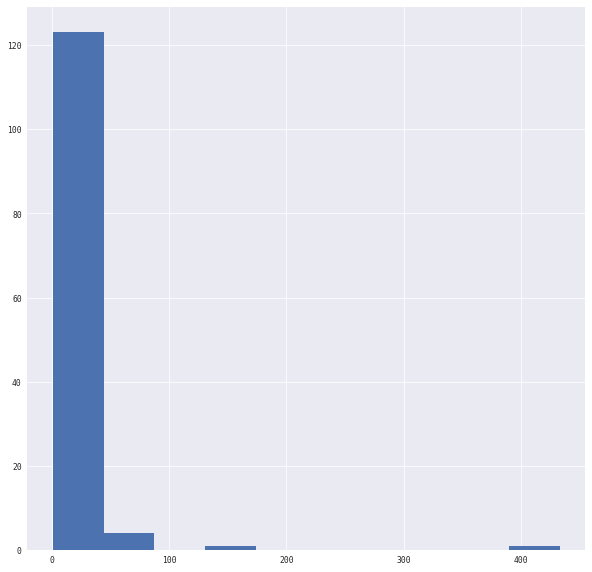

In [8]:
mac_diff.hist(figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013715B7C4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000013715E2AF60>]], dtype=object)

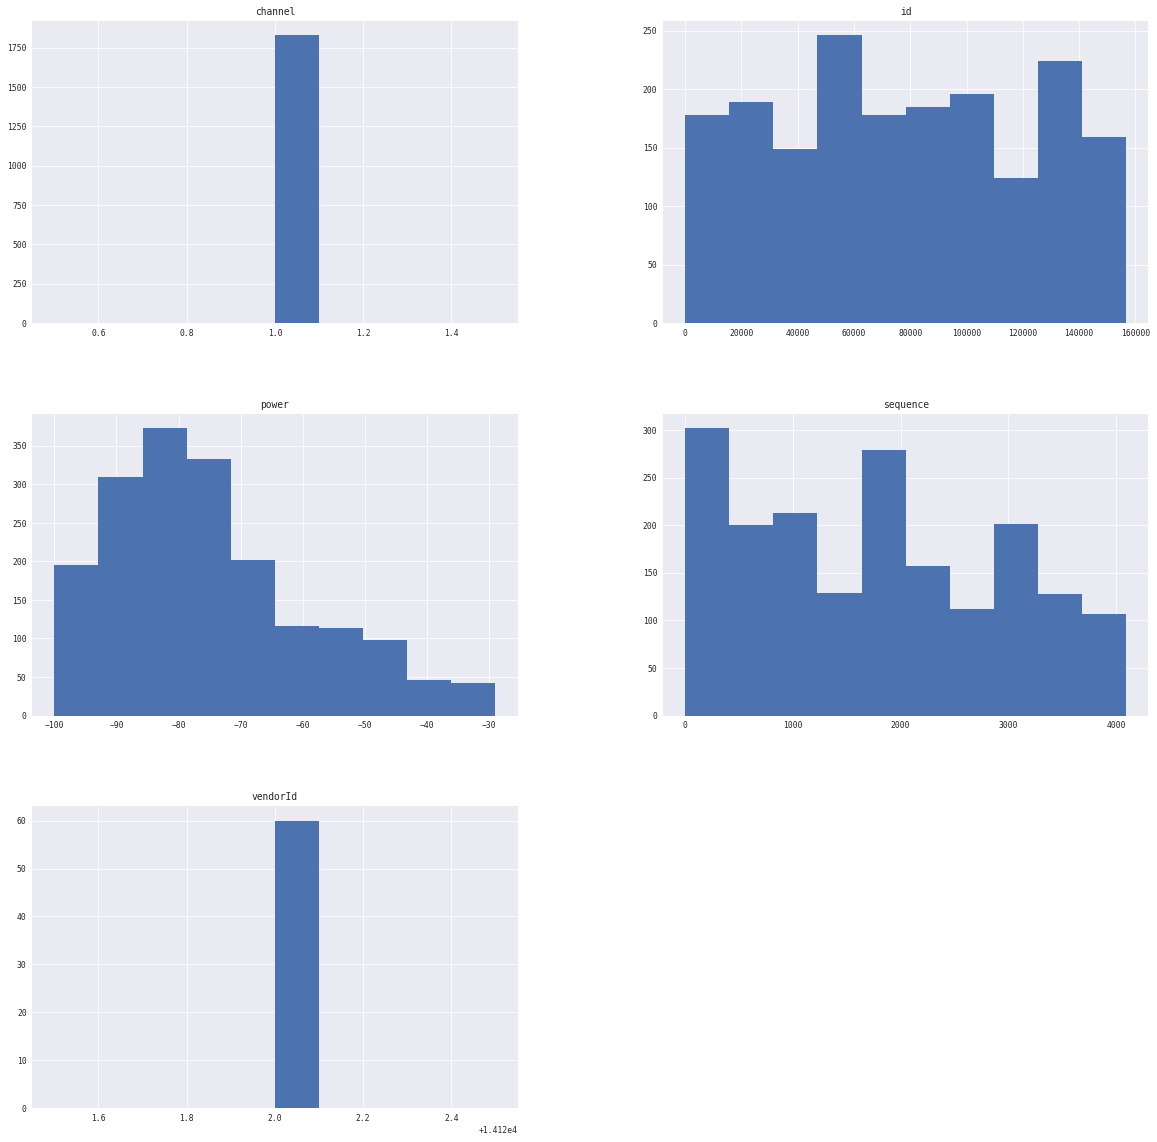

In [9]:
df.hist(figsize=(20, 20))

# Come si fa a vedere anche gli altri campi?

#Notiamo che il channel è sempre lo stesso, non serve a nulla per la classificazione, la stessa cosa può valere per vendorID
# se non contiamo la differenza tra NaN e l'unico valore presente

In [10]:
# Lista dei Mac noti
# I mac non randomizzati si possono distinguere da quelli reali considerando se è un mac associato ad un'azienda
# I mac non possono essere randomizzati usando mac appartenenti a range posseduti da aziende, in quanto potrebbero
# esistere device con quel mac     DIREI
#
# Inoltre riusciamo ad aggiungere ai pacchetti un informazione che può essere non banale: il vendor

mac_vendor = pd.read_csv('MIE_resources/mac_address_vendor.csv')

In [11]:
for i in range(0, len(mac_vendor)):
    mac_vendor.loc[i, 'prefix'] = mac_vendor.prefix[i][0:2].lower()+":"+mac_vendor.prefix[i][2:4].lower()+":"+mac_vendor.prefix[i][4:6].lower()
mac_vendor.head(10)

Unnamed: 0                                        companyName country  \
0           0               Shenzhen ViewAt Technology Co.,Ltd.       CN   
1           1  Integrated Device Technology (Malaysia) Sdn. Bhd.      MY   
2           2                                            NETGEAR      US   
3           3                                    Hewlett Packard      US   
4           4                                    Hewlett Packard      US   
5           5                                    Hewlett Packard      US   
6           6                                    Hewlett Packard      US   
7           7                              Cognitec Systems GmbH      DE   
8           8                                 D-Link Corporation      TW   
9           9                                 D-Link Corporation      TW   

     prefix streetAddress1 streetAddress2  
0  e0:43:db            NaN            NaN  
1  24:05:f5            NaN            NaN  
2  2c:30:33            NaN            NaN  
3  3c:d9:2b            NaN            NaN  
4  9c:8e:99            NaN            NaN  
5  b4:99:ba            NaN            NaN  
6  1c:c1:de            NaN            NaN  
7  3c:35:56            NaN            NaN  
8  00:50:ba            NaN            NaN  
9  00:17:9a            NaN            NaN

In [12]:
#df.insert(3, 'vendor', ['']*len(df))

for i in range(0, len(df)):
    vendor = mac_vendor.loc[mac_vendor['prefix'] == df.loc[i, 'mac'][0:8]].companyName.tolist()
    if(len(vendor)>0):
        df.loc[i, 'vendor'] = vendor[0]
        df.loc[i, 'randomized'] = False
    else:
        df.loc[i, 'randomized'] = True

In [13]:
df.head()

id                           Time                mac  power  sequence  \
0     3  2017-07-12 12:21:04.643966109  98:9e:63:51:e5:d8    -92      1911   
1   728  2017-07-12 12:21:12.642847667  84:2e:27:fb:22:a3    -88      3487   
2   732  2017-07-12 12:21:12.672652811  84:2e:27:fb:22:a3    -95      3488   
3   797  2017-07-12 12:21:13.436520417  d0:23:db:d0:ec:88    -89      2989   
4  1107  2017-07-12 12:21:16.989734405  40:0e:85:35:d1:db    -71      2781   

      SSID   suppRates           ExtSuppRates HTCapabilitiesInfo AMPDU  \
0  eduroam  1,2,5.5,11  6,9,12,18,24,36,48,54             0x0021  0x17   
1      NaN  1,2,5.5,11  6,9,12,18,24,36,48,54             0x012c  0x03   
2      NaN  1,2,5.5,11  6,9,12,18,24,36,48,54             0x012c  0x03   
3      NaN  1,2,5.5,11  6,9,12,18,24,36,48,54             0x1800  0x1b   
4  Papilio  1,2,5.5,11  6,9,12,18,24,36,48,54             0x102d  0x17   

  HTExtendendCapabilities                                     orderedTagList  \
0                  0x0000  SSID parameter set,Supported Rates,Extended Su...   
1                  0x0000  SSID parameter set,Supported Rates,Extended Su...   
2                  0x0000  SSID parameter set,Supported Rates,Extended Su...   
3                  0x0000  SSID parameter set,Supported Rates,Extended Su...   
4                  0x0000  SSID parameter set,Supported Rates,Extended Su...   

  formattingCapabilities  channel UUID primaryDevice model modelNumber  \
0                    NaN        1  NaN           NaN   NaN         NaN   
1                    NaN        1  NaN           NaN   NaN         NaN   
2                    NaN        1  NaN           NaN   NaN         NaN   
3             0x00000000        1  NaN           NaN   NaN         NaN   
4             0x00000000        1  NaN           NaN   NaN         NaN   

  deviceName vendorExtention  vendorId  \
0        NaN             NaN       NaN   
1        NaN             NaN       NaN   
2        NaN             NaN       NaN   
3        NaN             NaN       NaN   
4        NaN             NaN       NaN   

                                            OUI  \
0                    00-17-f2,00-50-f2,00-10-18   
1                                      00-50-f2   
2                                      00-50-f2   
3                             00-10-18,00-90-4c   
4  50-6f-9a,00-10-18,00-90-4c,00-90-4c,00-50-f2   

                                vendor randomized  
0                          Apple, Inc.      False  
1          Samsung Electronics Co.,Ltd      False  
2          Samsung Electronics Co.,Ltd      False  
3                          Apple, Inc.      False  
4  SAMSUNG ELECTRO-MECHANICS(THAILAND)      False

In [69]:
mac_randomizzati = df.loc[df['vendor'].isnull()]
mac_randomizzati

id                           Time                mac  power  \
107    11698  2017-07-12 12:23:01.449648451  da:a1:19:66:28:5d    -81   
108    11703  2017-07-12 12:23:01.481704923  da:a1:19:66:28:5d    -77   
109    11704  2017-07-12 12:23:01.483270819  da:a1:19:66:28:5d    -77   
110    11711  2017-07-12 12:23:01.521187096  da:a1:19:66:28:5d    -79   
111    11715  2017-07-12 12:23:01.554562296  da:a1:19:66:28:5d    -80   
112    11716  2017-07-12 12:23:01.556160069  da:a1:19:66:28:5d    -80   
214    20024  2017-07-12 12:24:20.393497233  96:29:f1:e6:00:8f    -87   
282    26207  2017-07-12 12:25:19.033793197  da:a1:19:84:77:6f    -93   
283    26210  2017-07-12 12:25:19.042096204  da:a1:19:84:77:6f    -93   
284    26216  2017-07-12 12:25:19.053013921  da:a1:19:84:77:6f    -95   
406    35854  2017-07-12 12:26:53.247438514  da:a1:19:65:5b:fc    -92   
407    35863  2017-07-12 12:26:53.289789598  e2:03:6d:44:55:ef    -92   
432    38542  2017-07-12 12:27:19.841224936  b9:e6:96:d9:1d:7c    -92   
433    38546  2017-07-12 12:27:19.861846612  b9:e6:96:d9:1d:7c    -95   
484    44693  2017-07-12 12:28:19.308668163  b2:8f:83:fa:38:65    -95   
487    44737  2017-07-12 12:28:19.577041816  b2:8f:83:fa:38:65    -90   
492    45587  2017-07-12 12:28:27.887605938  0e:1a:ac:b1:44:61    -94   
573    51360  2017-07-12 12:29:26.398610553  da:a1:19:22:b7:8e    -64   
574    51365  2017-07-12 12:29:26.419516744  da:a1:19:22:b7:8e    -67   
575    51374  2017-07-12 12:29:26.440555670  da:a1:19:22:b7:8e    -73   
576    51379  2017-07-12 12:29:26.460786389  da:a1:19:22:b7:8e    -69   
584    53041  2017-07-12 12:29:44.235407683  da:a1:19:a5:68:1c    -92   
624    55069  2017-07-12 12:30:04.662143473  da:a1:19:c4:63:17    -83   
625    55074  2017-07-12 12:30:04.676986558  da:a1:19:c4:63:17    -82   
628    55174  2017-07-12 12:30:05.581902566  da:a1:19:a1:2d:18    -84   
630    55181  2017-07-12 12:30:05.599725480  da:a1:19:a1:2d:18    -84   
631    55268  2017-07-12 12:30:06.506063209  da:a1:19:f7:ed:d8    -84   
632    55274  2017-07-12 12:30:06.521165048  da:a1:19:f7:ed:d8    -84   
633    55349  2017-07-12 12:30:07.426403685  da:a1:19:5c:fb:e6    -84   
634    55351  2017-07-12 12:30:07.441314035  da:a1:19:5c:fb:e6    -89   
...      ...                            ...                ...    ...   
1464  127905  2017-07-12 12:40:34.413668380  3a:1d:1f:cf:fd:fe    -95   
1474  128369  2017-07-12 12:40:39.911321221  92:5a:9e:67:36:cf    -76   
1475  128370  2017-07-12 12:40:39.930879295  92:5a:9e:67:36:cf    -80   
1501  130068  2017-07-12 12:40:54.762205416  ae:0c:95:fc:ee:5c    -90   
1502  130073  2017-07-12 12:40:54.793966676  ae:0c:95:fc:ee:5c    -88   
1539  133676  2017-07-12 12:41:27.625465874  92:5a:9e:67:36:cf    -88   
1581  137241  2017-07-12 12:42:05.831023744  56:92:63:1c:2d:95    -77   
1582  137253  2017-07-12 12:42:05.885971978  56:92:63:1c:2d:95    -80   
1585  137310  2017-07-12 12:42:06.347484205  56:92:63:1c:2d:95    -79   
1586  137311  2017-07-12 12:42:06.369576649  56:92:63:1c:2d:95    -79   
1608  138430  2017-07-12 12:42:18.255853996  3e:16:df:5a:51:d8    -67   
1609  138440  2017-07-12 12:42:18.309175069  3e:16:df:5a:51:d8    -68   
1610  138479  2017-07-12 12:42:18.674383461  3e:16:df:5a:51:d8    -67   
1611  138483  2017-07-12 12:42:18.694790620  3e:16:df:5a:51:d8    -68   
1612  138488  2017-07-12 12:42:18.715559760  3e:16:df:5a:51:d8    -76   
1613  138865  2017-07-12 12:42:22.786355680  3e:16:df:5a:51:d8    -63   
1614  138874  2017-07-12 12:42:22.806062085  3e:16:df:5a:51:d8    -62   
1615  138886  2017-07-12 12:42:22.829775516  3e:16:df:5a:51:d8    -64   
1616  138890  2017-07-12 12:42:22.849768697  3e:16:df:5a:51:d8    -63   
1641  139729  2017-07-12 12:42:30.862528222  b6:f9:de:12:b0:6f    -72   
1642  139737  2017-07-12 12:42:30.881521215  b6:f9:de:12:b0:6f    -71   
1643  139749  2017-07-12 12:42:30.918499520  b6:f9:de:12:b0:6f    -76   
1644  139751  2017-07-12 12:42:30.938903326  b6:f9:de:12:b0:6f    -7

In [73]:
mac_randomizzati.groupby('mac').mac.nunique().describe()

count    46.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: mac, dtype: float64

In [15]:
# Verifichiamo "statisticamente" se è vera l'ipotesi che le HT capab inviate sono sempre le stesse
count = {'suppRates': 0, 'ExtsuppRates': 0, 'HTCapabilitiesInfo': 0, 'AMPDU': 0,'HTExtendendCapabilities': 0, 'orderedTagList': 0, 'formattingCapabilities': 0, 'primaryDevice': 0, 'model': 0, 'modelNumber': 0, 'deviceName': 0, 'vendorExtention': 0,'vendorId': 0, 'OUI': 0}
for mac in mac_diff.keys():
    probes = df.loc[df['mac'] == mac]
    #Metto un valore random per riempire i valori nulli, siccome NaN != NaN
    probes.fillna(value=999999, inplace=True)    
    print("\n\n"+mac)
    c = len(probes.loc[(probes['suppRates'] != probes.suppRates.tolist()[0])])
    count['suppRates'] += c
    print("diverse suppRates:", c)
    c = len(probes.loc[probes['ExtSuppRates'] != probes.ExtSuppRates.tolist()[0]])
    count['ExtsuppRates'] += c
    print("diverse ExtsuppRates:", c)
    c = len(probes.loc[probes['HTCapabilitiesInfo'] != probes.HTCapabilitiesInfo.tolist()[0]])
    count['HTCapabilitiesInfo'] += c
    print("diverse HTCapabilitiesInfo:", c)
    c =  len(probes.loc[probes['AMPDU'] != probes.AMPDU.tolist()[0]])
    count['AMPDU'] += c
    print("diverse AMPDU:",c)
    c = len(probes.loc[probes['HTExtendendCapabilities'] != probes.HTExtendendCapabilities.tolist()[0]])
    count['HTExtendendCapabilities'] += c
    print("diverse HTExtendendCapabilities:", c)
    c = len(probes.loc[probes['orderedTagList'] != probes.orderedTagList.tolist()[0]])
    count['orderedTagList'] += c
    print("diverse orderedTagList:", c)
    c =len(probes.loc[probes['formattingCapabilities'] != probes.formattingCapabilities.tolist()[0]])
    count['formattingCapabilities'] += c
    print("diverse formattingCapabilities:", c)
    c = len(probes.loc[probes['primaryDevice'] != probes.primaryDevice.tolist()[0]])
    count['primaryDevice'] += c
    print("diverse primaryDevice:", c)
    c = len(probes.loc[probes['model'] != probes.model.tolist()[0]])
    count['model'] += c
    print("diverse model:", c)
    c = len(probes.loc[probes['modelNumber'] != probes.modelNumber.tolist()[0]])
    count['modelNumber'] += c
    print("diverse modelNumber:", c)
    c = len(probes.loc[probes['deviceName'] != probes.deviceName.tolist()[0]])
    count['deviceName'] += c
    print("diverse deviceName:", c)
    c = len(probes.loc[probes['vendorExtention'] != probes.vendorExtention.tolist()[0]])
    count['vendorExtention'] += c
    print("diverse vendorExtention:", c)
    c = len(probes.loc[probes['vendorId'] != probes.vendorId.tolist()[0]])
    count['vendorId'] += c
    print("diverse vendorId:", c)
    c = len(probes.loc[probes['OUI'] != probes.OUI.tolist()[0]])
    count['OUI'] += c
    print("diverse OUI:", c)


C:\Users\simone\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)




00:25:d3:84:72:27
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


08:3d:88:44:2a:ed
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


08:ee:8b:6e:74:b9
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceNa

diverse vendorId: 0
diverse OUI: 0


56:92:63:1c:2d:95
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


5c:70:a3:25:12:b3
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


60:d9:c7:ae:cf:25
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
dive

diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


cc:c3:ea:37:62:44
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


d0:23:db:d0:ec:88
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


d0:53:49:06:eb:4d
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse 

diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


da:a1:19:e2:7b:2f
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


da:a1:19:f2:c4:af
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapabilitiesInfo: 0
diverse AMPDU: 0
diverse HTExtendendCapabilities: 0
diverse orderedTagList: 0
diverse formattingCapabilities: 0
diverse primaryDevice: 0
diverse model: 0
diverse modelNumber: 0
diverse deviceName: 0
diverse vendorExtention: 0
diverse vendorId: 0
diverse OUI: 0


da:a1:19:f7:ed:d8
diverse suppRates: 0
diverse ExtsuppRates: 0
diverse HTCapa

In [16]:
# Mac che fanno casino con le orderedTagList, vediamoli:
# Come possiamo notare il problema delle orderedTagCapabilities è che a volte alcuni campi vengono inviati, altre volte no
# se si vuole utilizzarle (non credo sia necessario) prima bisogna fare un po' di "data trasformation", da una lista di campi
# farlo diventare un vettore di elementi {presente / non presente} e poi dare una definizione di distanza
# o meglio, secondo il nostro cluster a regole si possono joinare due cluster se un orderedTagList di un cluster corrisponde
# ad almeno uno di un altro
#
#
print("78:00:9e:5f:8d:92: \n",df.loc[df['mac'] == '78:00:9e:5f:8d:92']['orderedTagList'].unique().tolist())
print("\n\n 8c:79:67:82:33:a1: \n",df.loc[df['mac'] == '8c:79:67:82:33:a1']['orderedTagList'].unique().tolist())
print("\n\n dc:ee:06:1c:2d:c3: \n",df.loc[df['mac'] == 'dc:ee:06:1c:2d:c3']['orderedTagList'].unique().tolist())

78:00:9e:5f:8d:92: 
 ['SSID parameter set,Supported Rates,Extended Supported Rates,DS Parameter set,HT Capabilities (802.11n D1.10),Vendor Specific,Vendor Specific', 'SSID parameter set,Supported Rates,Extended Supported Rates,DS Parameter set,HT Capabilities (802.11n D1.10),Vendor Specific']


 8c:79:67:82:33:a1: 
 ['SSID parameter set,Supported Rates,Extended Supported Rates', 'SSID parameter set,Supported Rates,Extended Supported Rates,DS Parameter set,HT Capabilities (802.11n D1.10),Vendor Specific,Extended Capabilities,Interworking,Vendor Specific']


 dc:ee:06:1c:2d:c3: 
 ['SSID parameter set,Supported Rates,Extended Supported Rates,DS Parameter set,HT Capabilities (802.11n D1.10),Vendor Specific', 'SSID parameter set,Supported Rates,Extended Supported Rates']


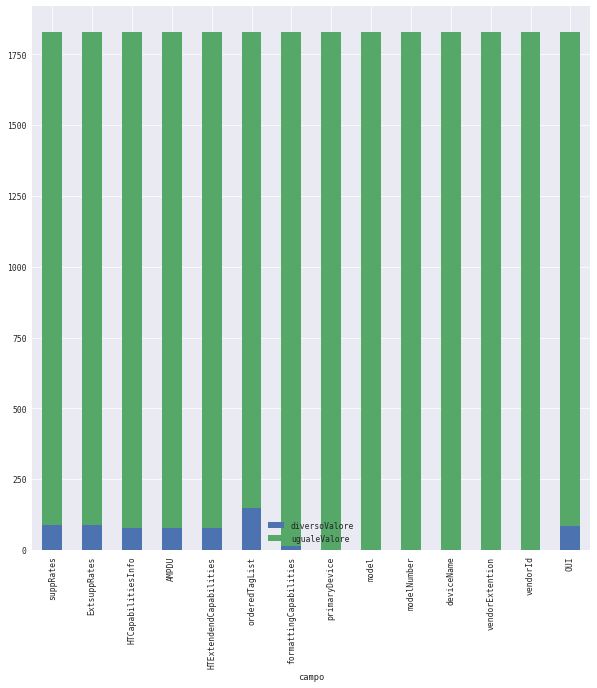

In [17]:
#
# Possiamo notare come i campi caratterizzanti il device possono essere supposti inviati sempre uguali da un device
# Ulteriori analisi mostrano inoltre che i campi diversi (blu) sono stati considerati diversi solamente perchè nulli
# -> I campi caratterizzanti il device perciò sono inviati sempre uguali o sono in alcuni casi inviati nulli
# Ciò non vale però per il campo orderedTagList, a quanto pare l'ordinamento dei tag in alcuni casi può cambiare
# per sviare questo problema si può pensare di non affidarsi a questo campo e quindi di rimuoverlo prima del clustering
#
# TOGLIERLO???
#

items = list()
for item in count.items():
    items.append(item)
items
eq = pd.DataFrame.from_records(items, columns=['campo', 'diversoValore'])
for i in range(0, len(eq)):
    eq.loc[i, 'ugualeValore'] = len(df)-eq.loc[i, 'diversoValore']
eq.plot.bar(stacked=True,figsize=(10,10), x=eq['campo']);

In [18]:
# Può essere perciò opportuno non basare il calcolo della distanza sui missing data ma solamente su valori non nulli
# es. 
# dist(i, j){
#    ....
#    if(!Aj.isnull() && !Ai.isnull() && Ai == Aj) return 0
#}
# NOTA: ciò viene fatto in automatico, si potrebbe scivere direttamente #    if(Ai == Aj) return 0
# in quanto in python due valori NaN NON SONO UGUALI
#    (vedi sotto)



df.loc[df['mac'] == '40:f3:08:3a:f3:c1']
#8c:79:67:82:33:a1
print(df.HTCapabilitiesInfo[18])
print(df.HTCapabilitiesInfo[1725])
print(df.HTCapabilitiesInfo[18] == df.HTCapabilitiesInfo[1725])

nan
nan
False


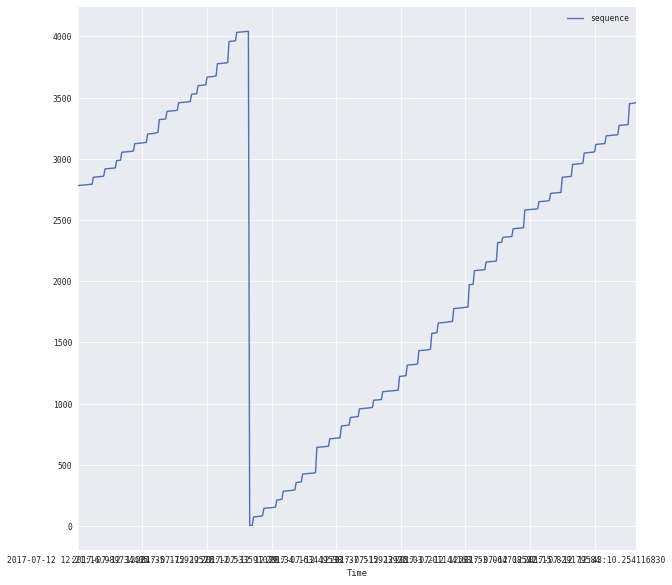

In [19]:
#
# Mostriamo ora il comportamento dei Sequence Number
# Durante il clustering una regola può essere data da: "se le HTCapabilities sono le stesse e i sequence number formano
# un comportamento particolare allora clusterizza"
#
# Come possiamo vedere i sequence number sono non decrescenti (tranne al momento del reset) ->hanno una forma particolare,
# ciò può essere utilizzato per generare una regola
#
df.loc[df['mac'] == '40:0e:85:35:d1:db'].plot(x='Time', y='sequence', figsize=(10,10) )

C:\Users\simone\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


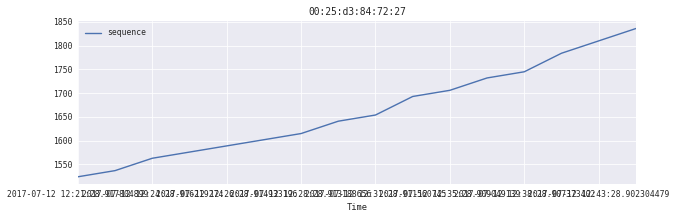

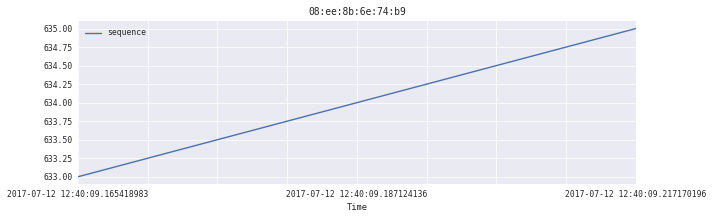

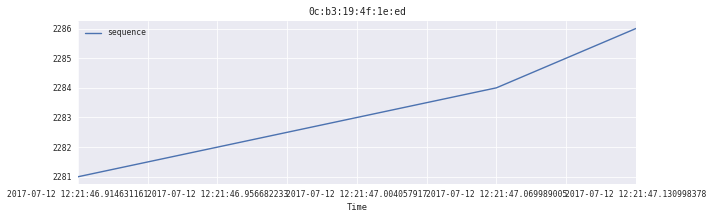

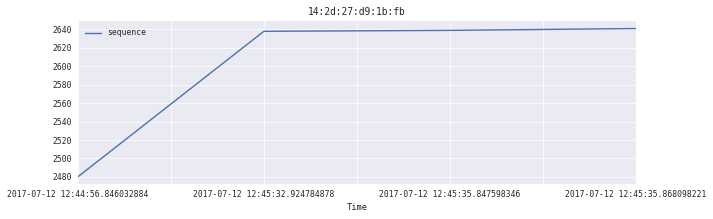

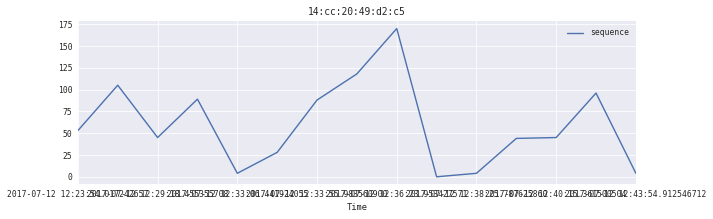

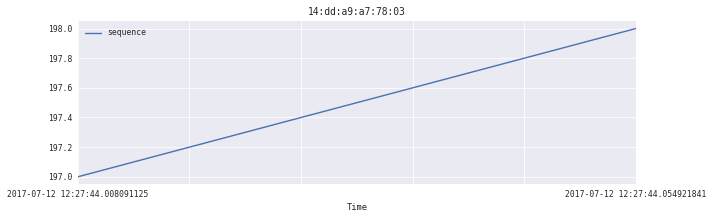

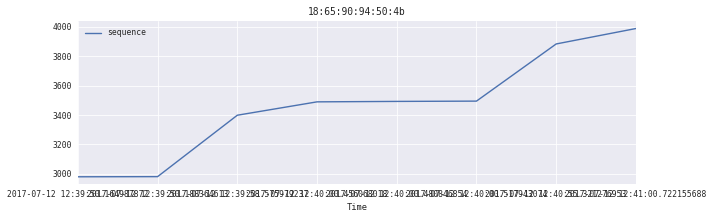

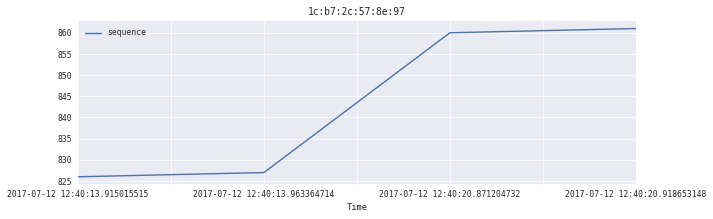

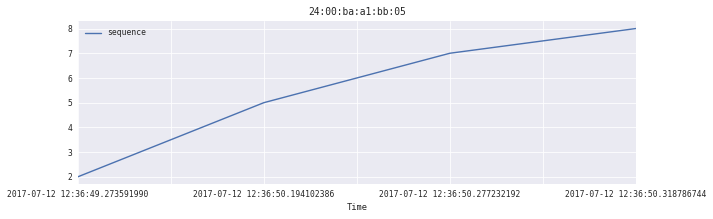

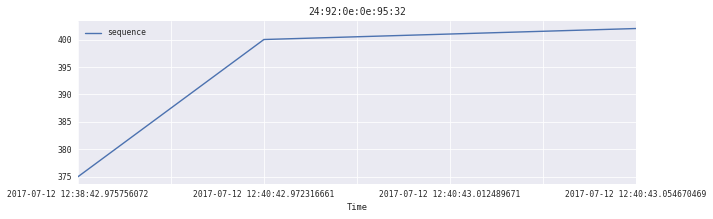

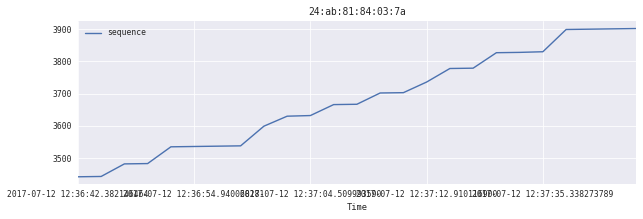

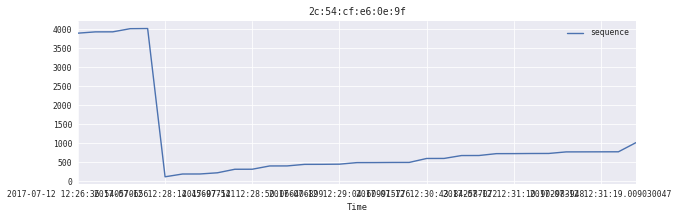

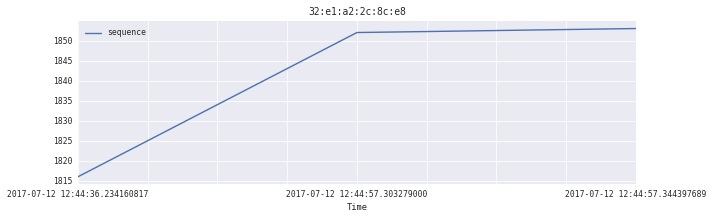

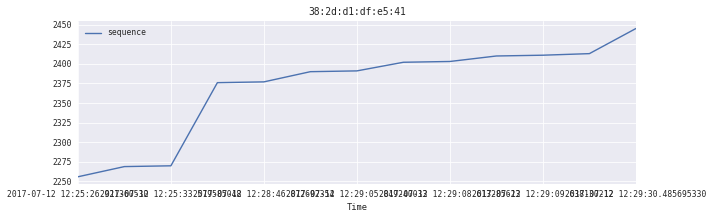

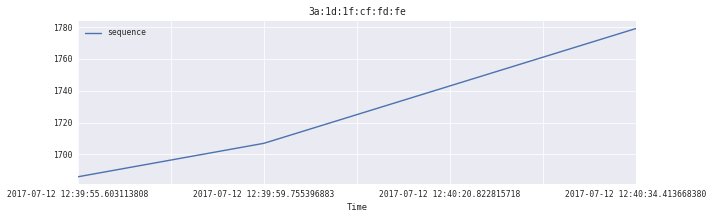

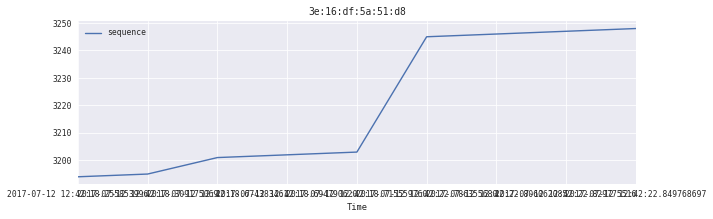

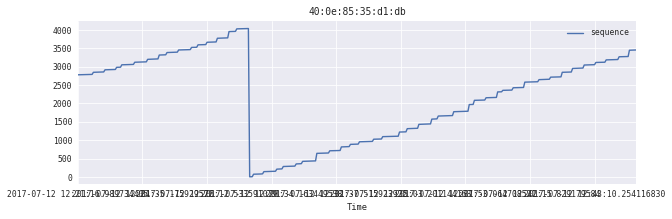

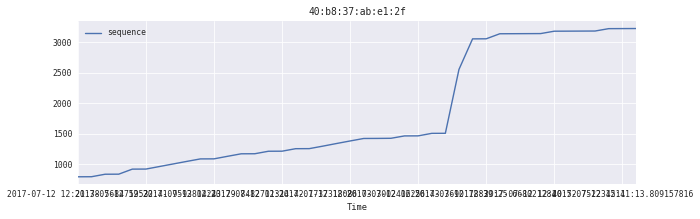

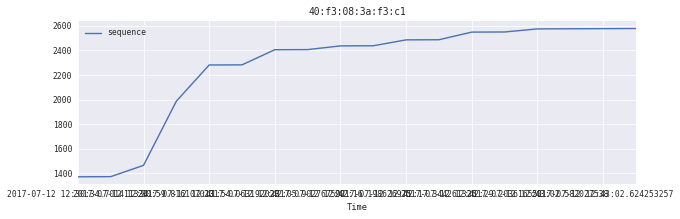

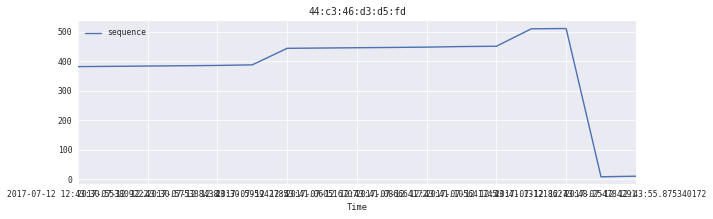

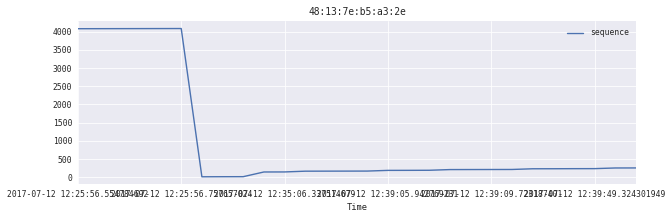

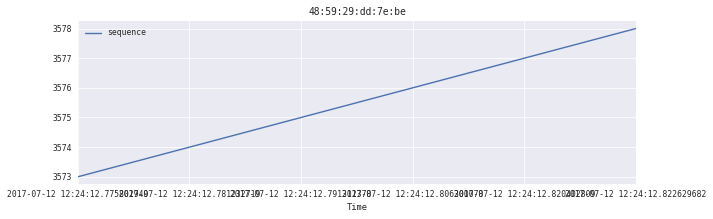

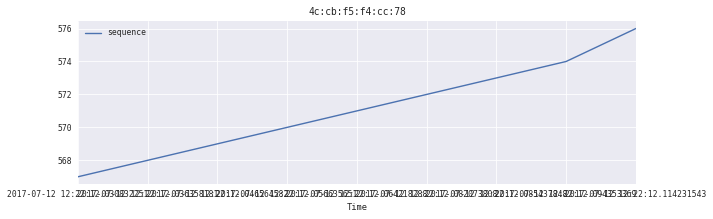

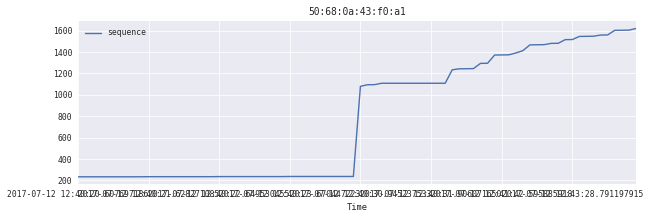

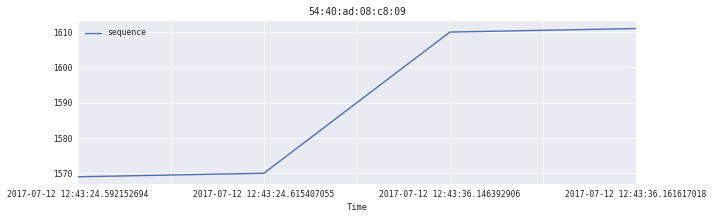

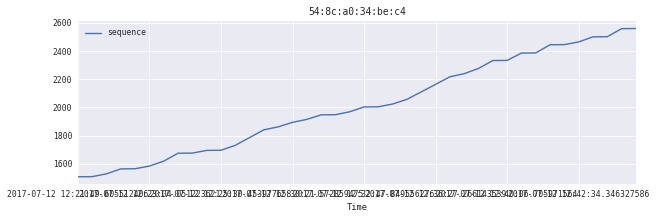

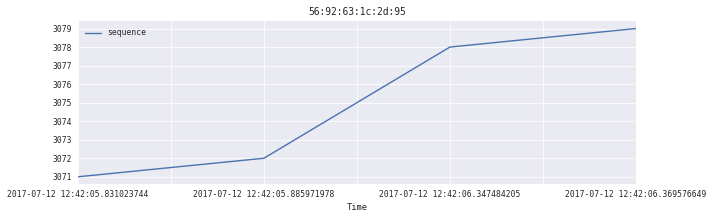

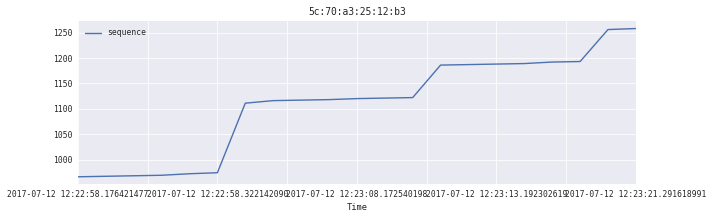

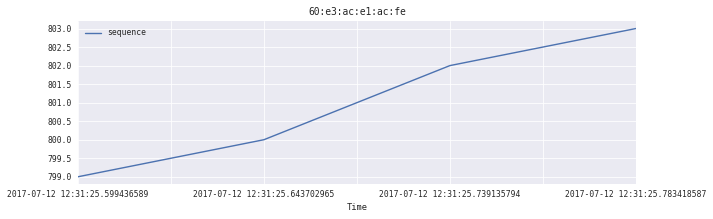

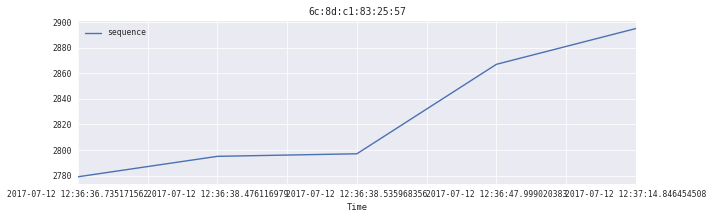

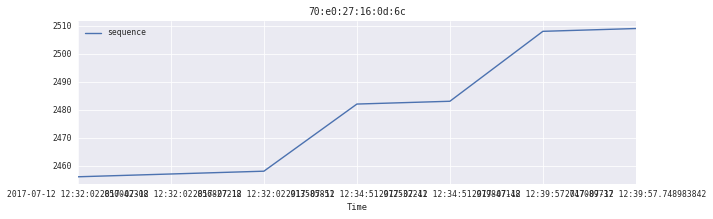

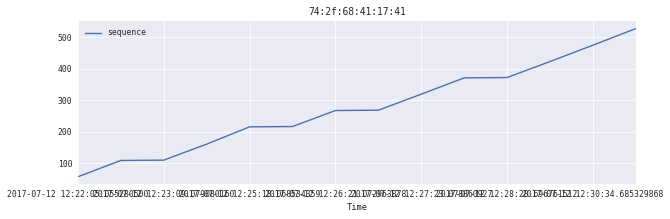

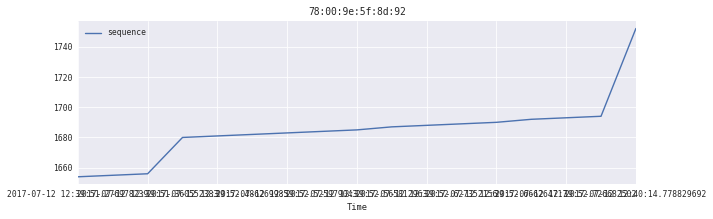

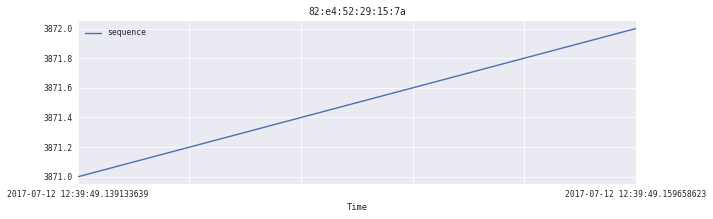

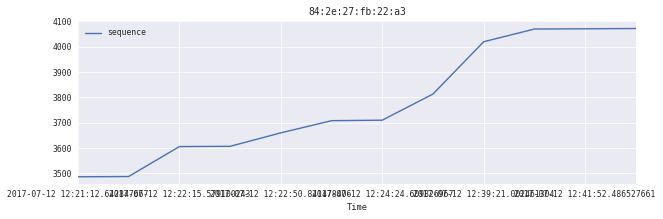

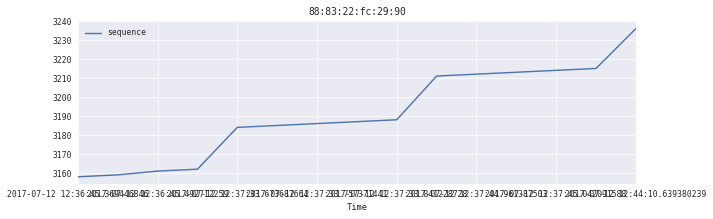

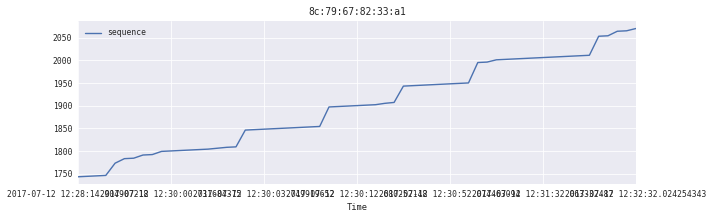

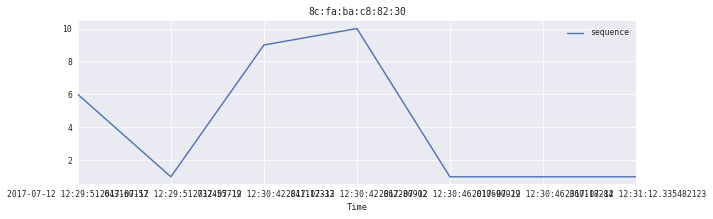

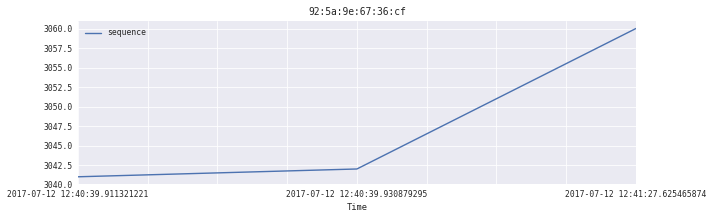

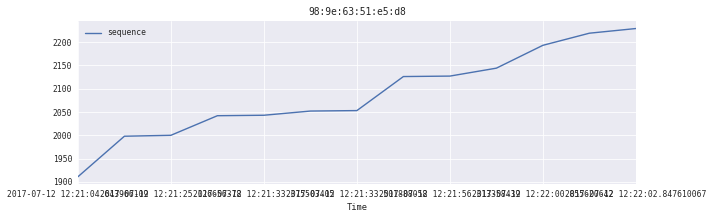

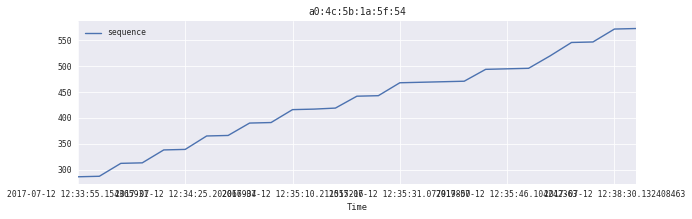

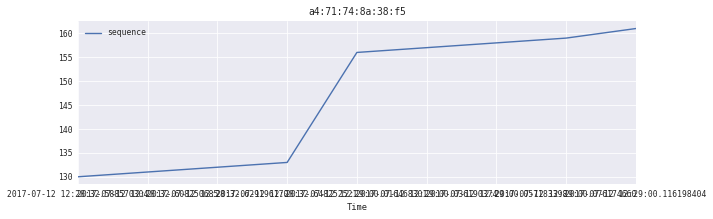

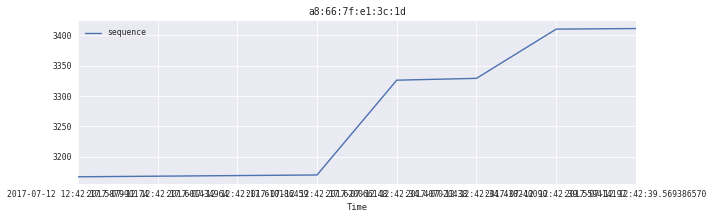

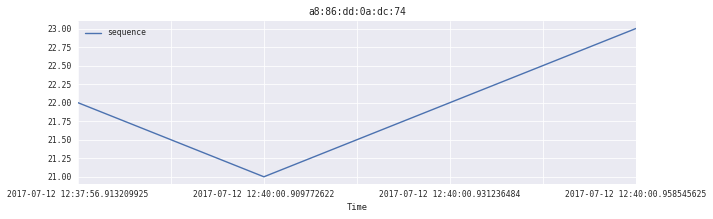

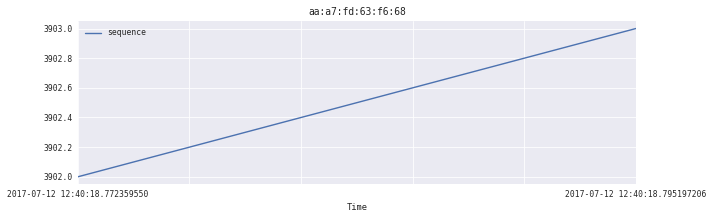

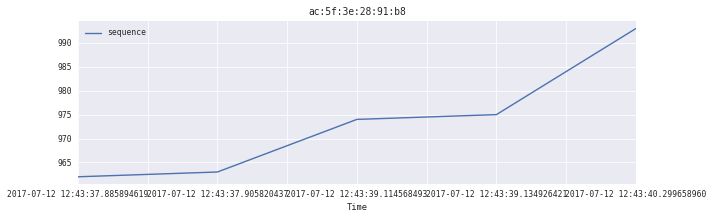

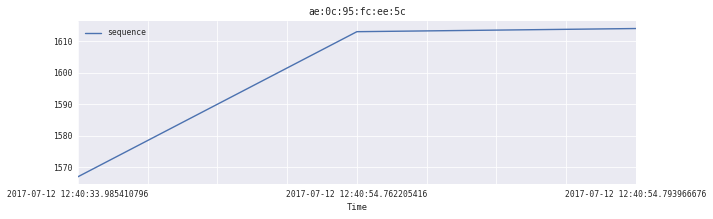

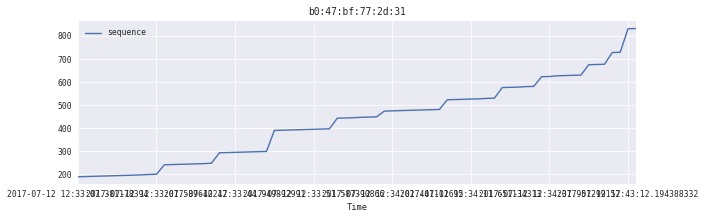

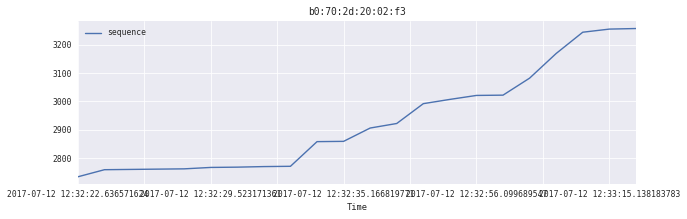

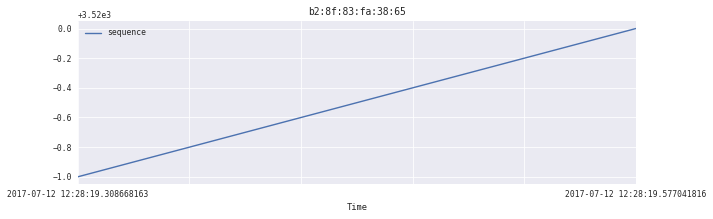

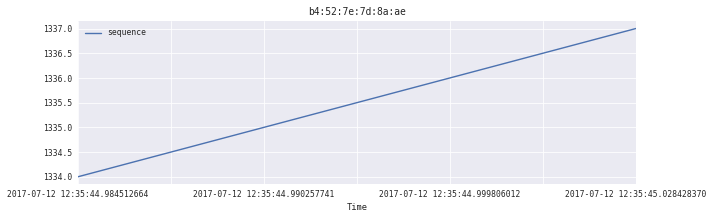

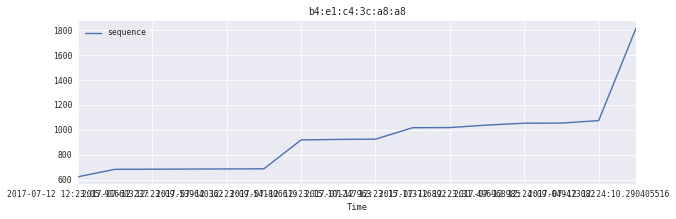

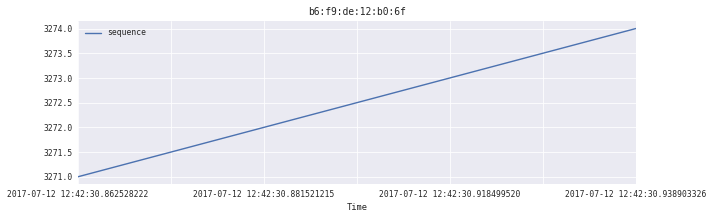

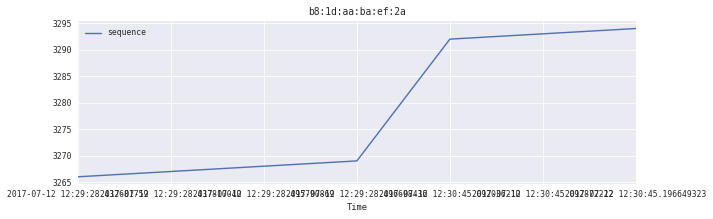

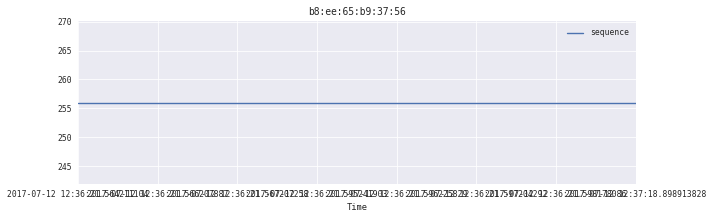

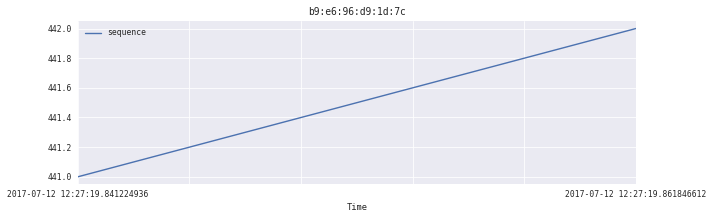

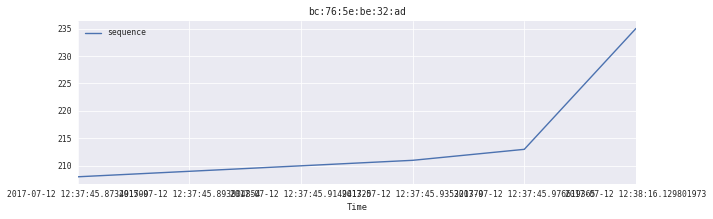

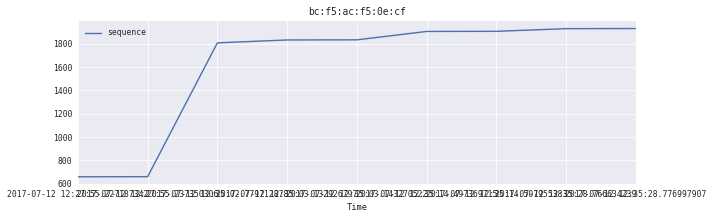

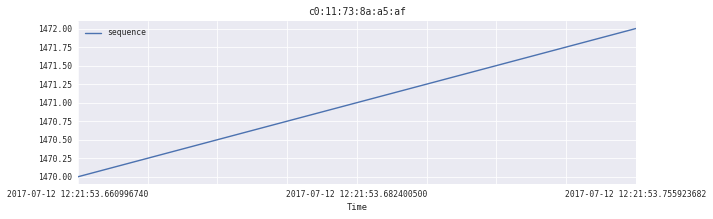

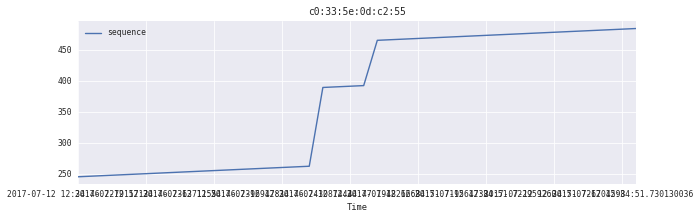

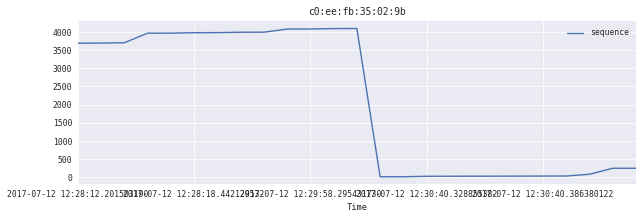

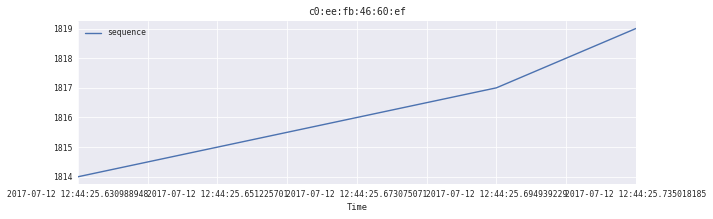

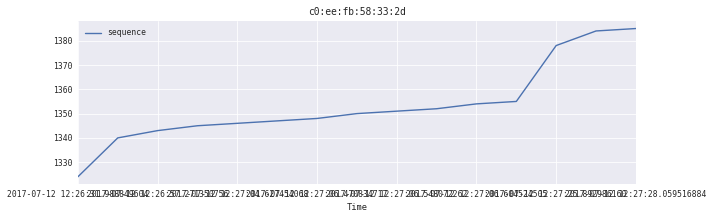

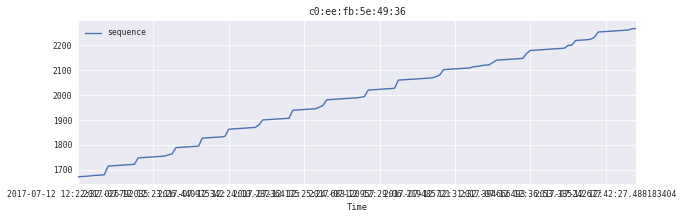

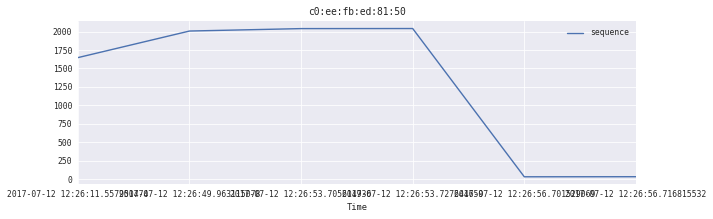

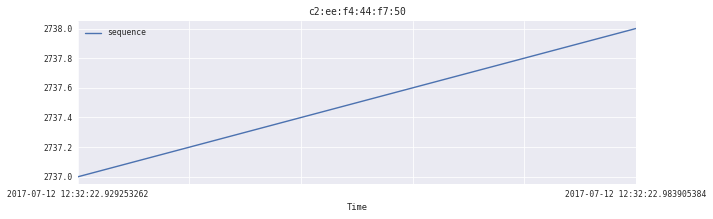

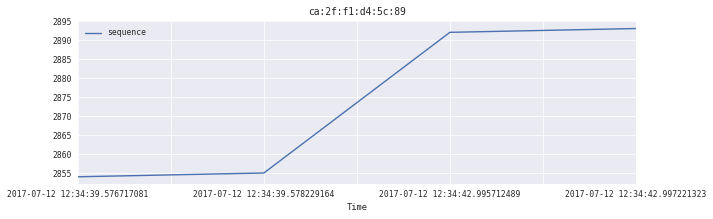

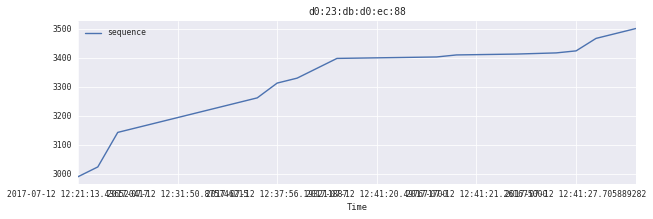

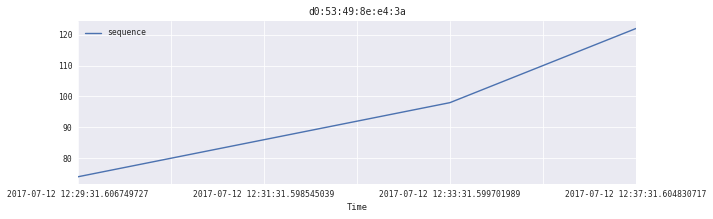

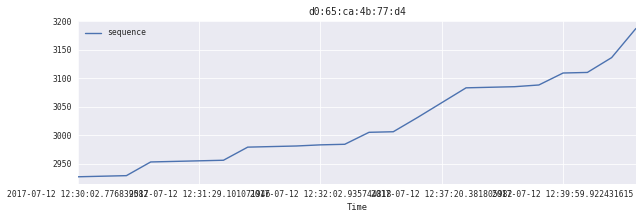

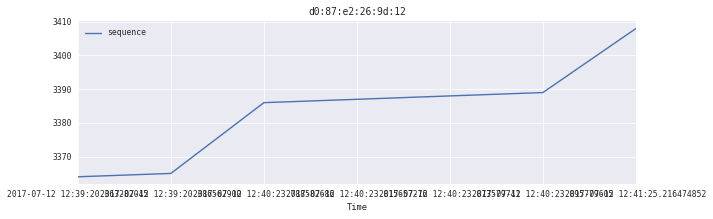

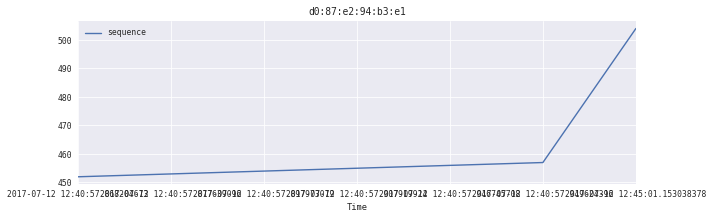

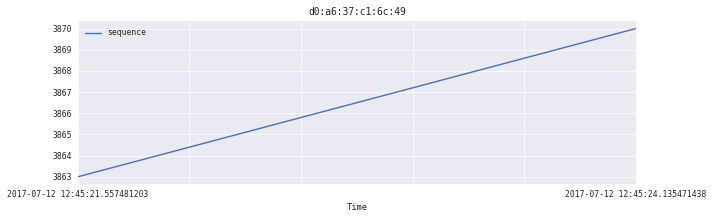

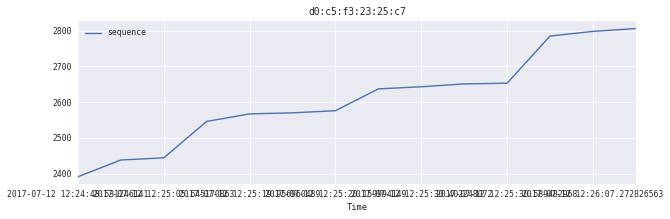

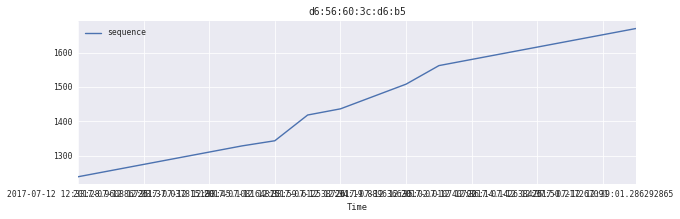

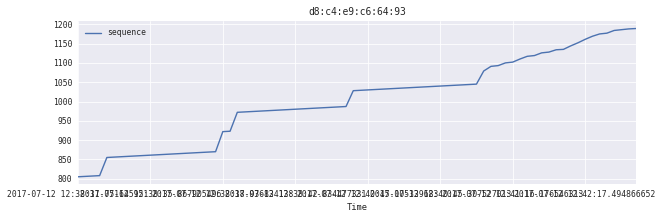

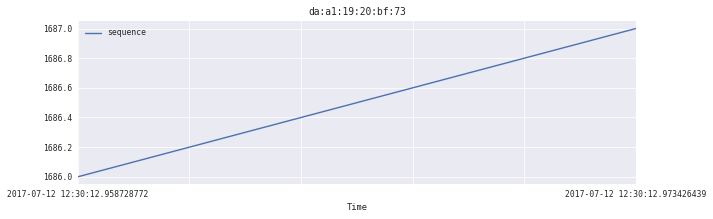

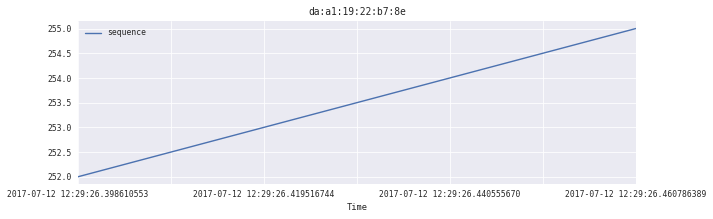

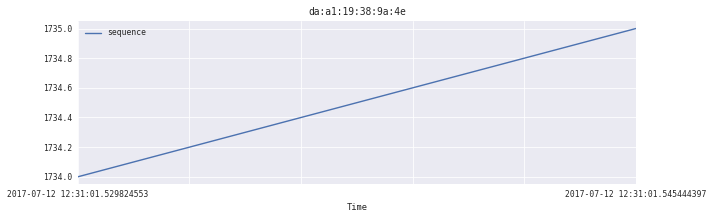

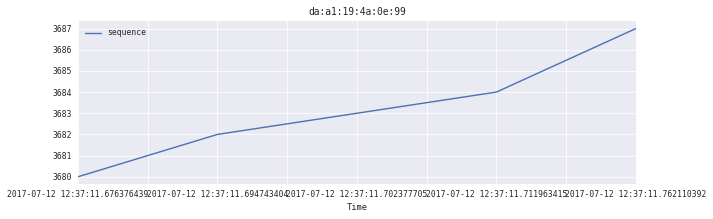

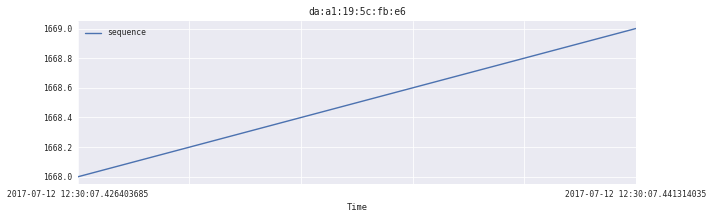

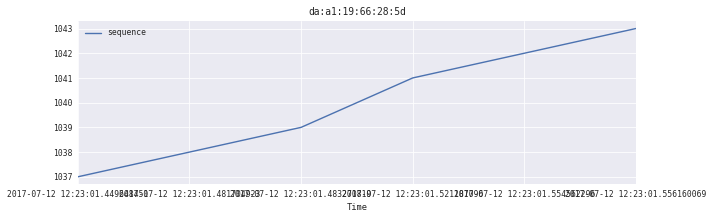

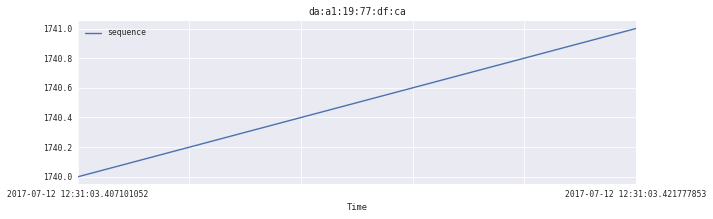

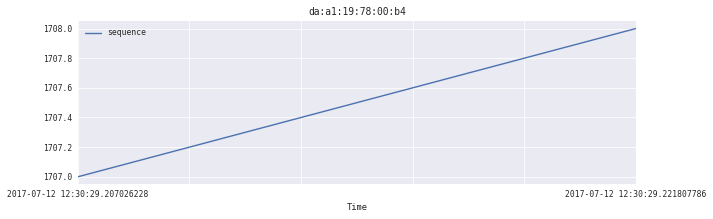

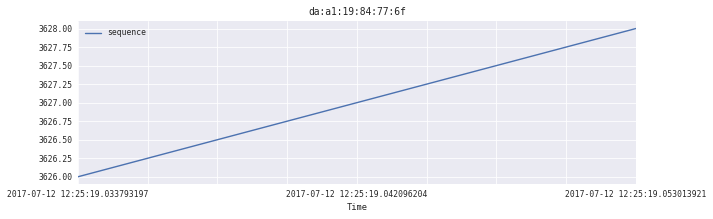

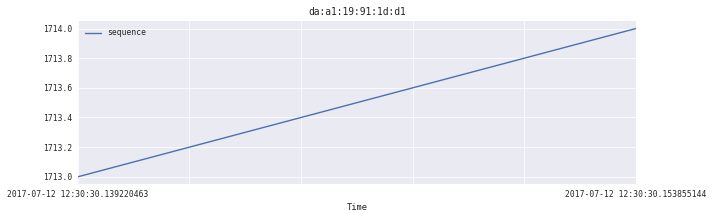

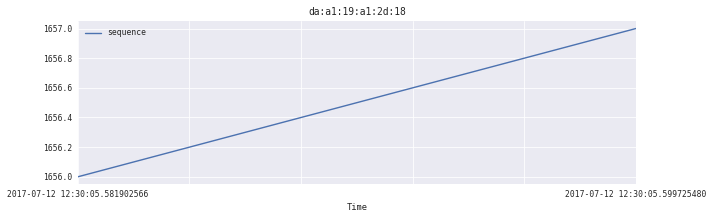

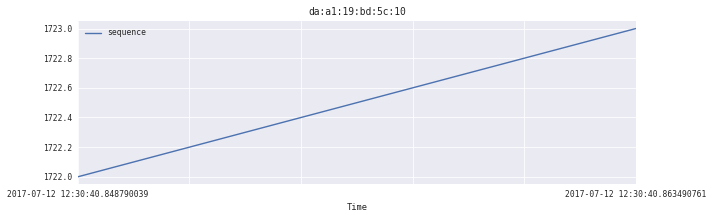

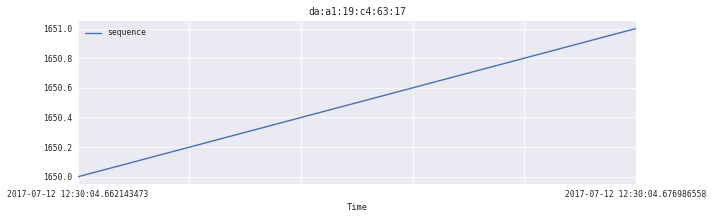

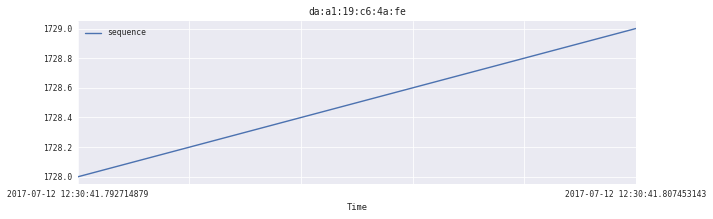

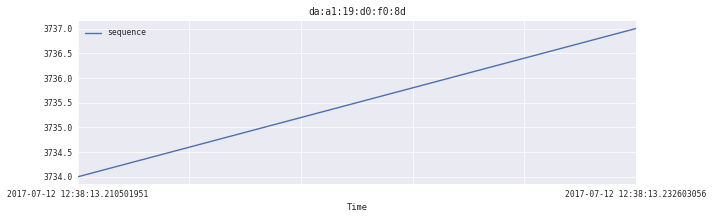

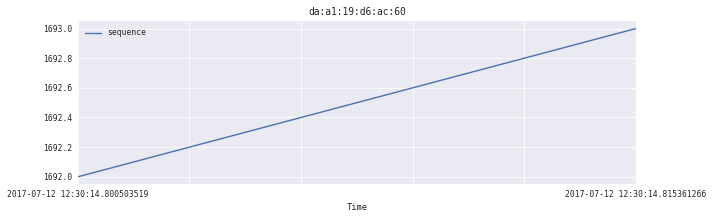

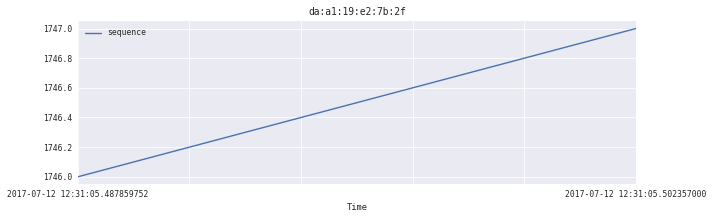

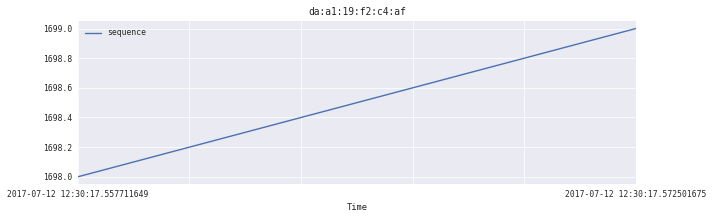

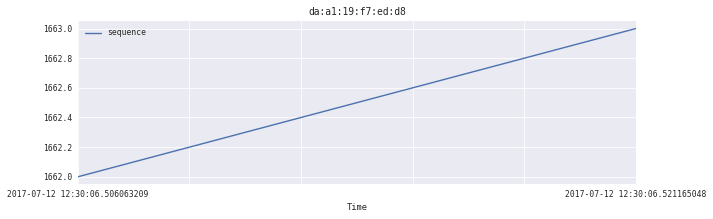

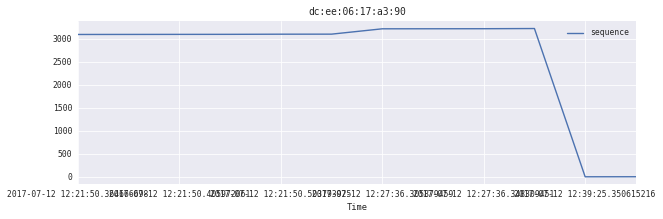

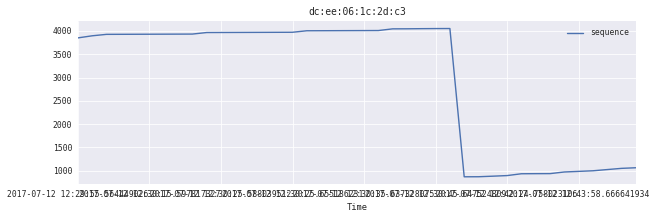

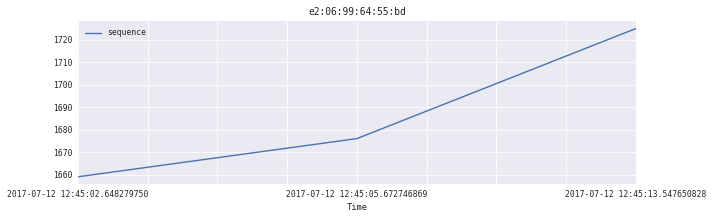

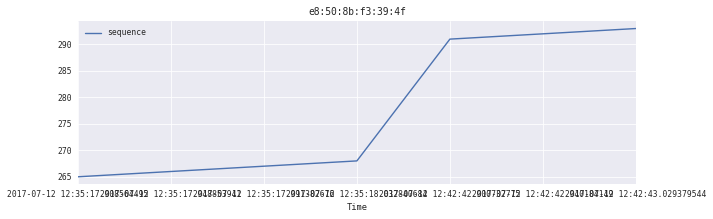

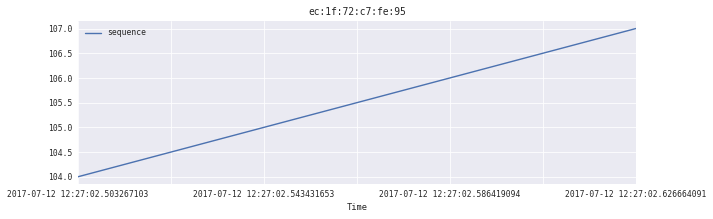

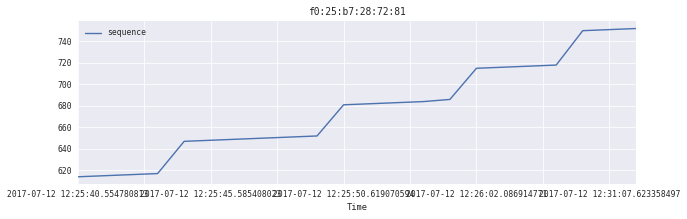

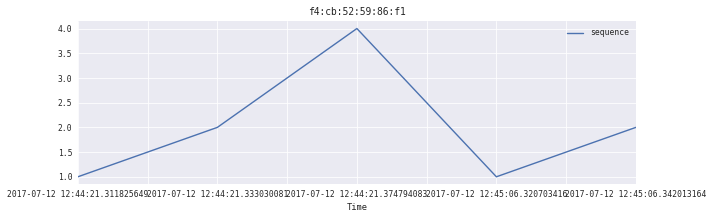

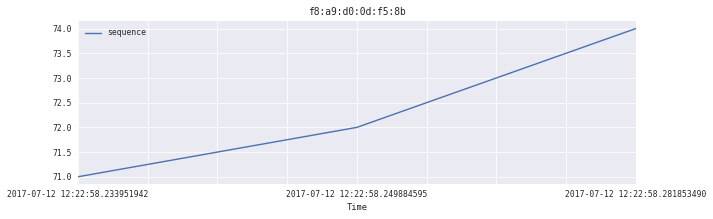

In [20]:
#
# Mostriamo ora che ciascun mac rispecchia un comportamento simile: non decrescente, con drop dovuti al reset
#

plt.figure(figsize=(10,10))
for mac in mac_diff.keys():
    pl = df.loc[df['mac'] == mac]
    if(len(pl)>1):
        pl.plot(x='Time', y='sequence', figsize=(10,3), title=mac)
plt.show()


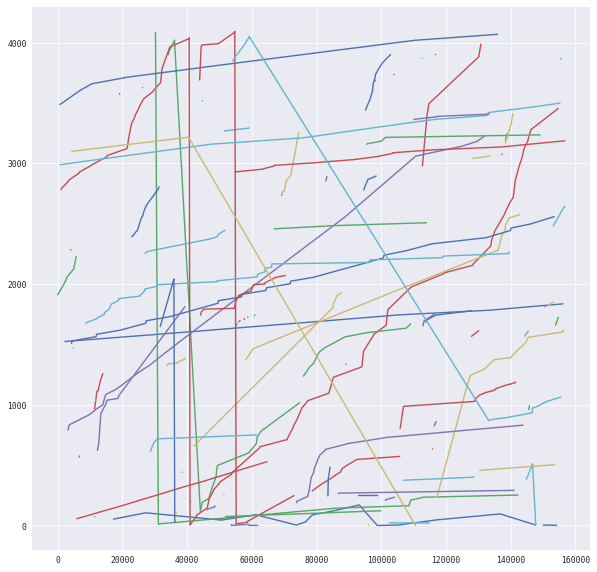

In [21]:
plt.figure(figsize=(10, 10))
for mac in mac_diff.keys():
    p = df.loc[df['mac'] == mac]
    #p.sort_values(['id'], inplace=True)
    #p.reset_index(drop=True, inplace=True)
    plt.plot(p['id'], p['sequence'])
plt.show()

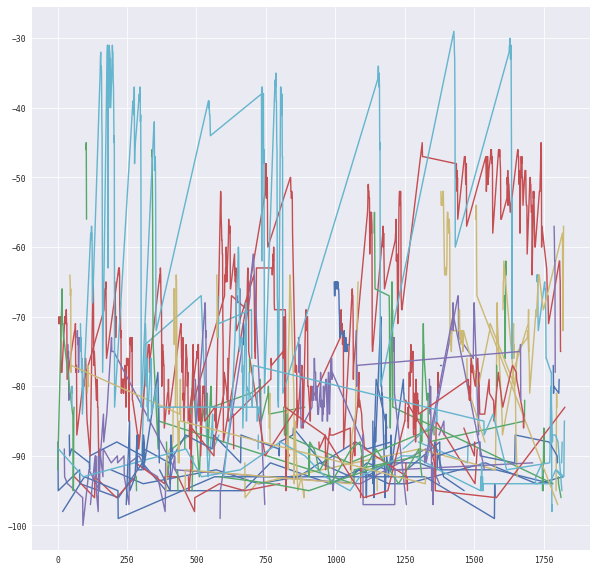

In [22]:
#
# Mostriamo invece che la potenza non è considerato un campo sufficientemente preciso, e che le potenze variano troppo
# bruscamente, e sono tutte troppo uguali per essere definito un metodo di classificazione preciso
#
#
plt.figure(figsize=(10, 10))
for mac in mac_diff.keys():
    plt.plot(df.loc[df['mac'] == mac]['power'])
plt.show()

In [23]:
#from scipy.cluster.hierarchy import dendrogram, linkage
#Z = linkage(df, 'ward')

In [24]:
#
# Classe Cluster:
#
# tiene traccia di:
# - MAC presenti nel cluster (mac appartenenti allo stesso device)
# - SSID presenti nel cluster
# - UUID presenti nel cluster
# - Device HTcap del device stante il cluster
# - realMacFound: se è stato trovato il vero mac o meno
#

class Cluster:
    def __init__(self, item0):
        #self.centroid = centroid
        self.cluster = pd.DataFrame(item0, columns = df.columns)
        self.cluster.loc[0] = item0
        #Lista di mac a cui è associato il device del cluster
        self.MACs = list()
        self.MACs.append(item0.mac)
        #Lista di SSID a cui è assocuato il device del cluster
        self.SSIDs = list()
        if(item0.notnull().SSID):
            self.SSIDs.append(item0.SSID)
        #Lista di UUID a cui è associato il device del cluster
        self.UUIDs = list()
        if(item0.notnull().UUID):
            self.UUIDs.append(item0.UUID)
        #Se è stato trovato il vero mac o meno
        self.realMacFound = not item0.randomized
        #Dizionario delle HTCapabilities caratterizzanti il device
        #self.HTCap = {'suppRates': item0.suppRates, 'ExtSuppRates': item0.ExtSuppRates,'HTCapabilitiesInfo': item0.HTCapabilitiesInfo, 'AMPDU': item0.AMPDU, 'HTExtendendCapabilities': item0.HTExtendendCapabilities, 'orderedTagList': item0.orderedTagList, 'formattingCapabilities': item0.formattingCapabilities, 'primaryDevice': item0.primaryDevice, 'model': item0.model, 'modelNumber': item0.modelNumber, 'deviceName': item0.deviceName, 'vendorExtention': item0.vendorExtention, 'vendorId': item0.vendorId, 'OUI': item0.OUI}
        #(attualmente ho tolto orderedTagList)
        self.HTCap = {'suppRates': item0.suppRates, 'ExtSuppRates': item0.ExtSuppRates,'HTCapabilitiesInfo': item0.HTCapabilitiesInfo, 'AMPDU': item0.AMPDU, 'HTExtendendCapabilities': item0.HTExtendendCapabilities, 'formattingCapabilities': item0.formattingCapabilities, 'primaryDevice': item0.primaryDevice, 'model': item0.model, 'modelNumber': item0.modelNumber, 'deviceName': item0.deviceName, 'vendorExtention': item0.vendorExtention, 'vendorId': item0.vendorId, 'OUI': item0.OUI}

In [25]:
#
# Funzione di Distanza definita secondo regole
# Se la distanza = 0 allora unisci i cluster
#

#Controlliamo che le sequences formino un pattern crescente, con drop che devono stare sotto il lowerbound
def check_sequences(cluster1, cluster2):
    lowerbound = 350

    merge = cluster1.append(cluster2)
    merge.sort_values(['id'], inplace=True)
    merge.reset_index(drop=True, inplace=True)
    for i in range(0,len(merge)-1):
        seq1 = merge.loc[i].sequence
        seq2 = merge.loc[i+1].sequence
        if(not (seq2>seq1 or seq2<lowerbound)):
            #La sequenza non va bene
            return False
    return True


def dist_device(cluster1, cluster2):
    for key in list(cluster1.HTCap.keys()):
        if(cluster1.HTCap[key]!=cluster2.HTCap[key] and str(cluster1.HTCap[key])!='nan' and str(cluster2.HTCap[key])!='nan'):
            return 1
    return 0


def distanza(cluster1, cluster2):
    # Regola 1: se i mac sono uguali, unisci i cluster
    #(non basta il mac del centroide, un cluster potrebbe avere più mac -> intersezione tra le liste)
    mac_intersection =list(set(cluster1.MACs) & set(cluster2.MACs))
    if(len(mac_intersection)>0):
        return 0
    
    #Regola 2: se i mac non sono uguali e sono non randomizzati, non clusterizzare
    if(cluster1.realMacFound & cluster2.realMacFound):
        return 1
    
    dist_dev = dist_device(cluster1, cluster2)
    
    #Regola 3: se i device sono diversi, non clusterizzare
    if(dist_dev != 0):
        return 1
    
    #Regola 4: se i device sono uguali e vale il controllo sui sequence clusterizza
    if(check_sequences(cluster1.cluster, cluster2.cluster)):
        return 0
    
    #Regola 5: se i device sono uguali ed hanno uno stesso SSID clusterizza
    ssid_intersection =list(set(cluster1.SSIDs) & set(cluster2.SSIDs))
    if(len(ssid_intersection)>0):
        return 0
    
    #Regola 6: se i device sono uguali ed hannp inviato uno stesso UUID clusterizza
    uuid_intersection = list(set(cluster1.UUIDs) & set(cluster2.UUIDs))
    if(len(uuid_intersection)>0):
        return 0
    
    #Altrimenti non clusterizzare
    return 1
        

In [26]:
def merge_cluster(cluster1, cluster2, clusters):
    #aggiungo cluster2 a cluster1
    cluster1.MACs = list(set(cluster1.MACs) | set(cluster2.MACs))
    cluster1.SSIDs = list(set(cluster1.SSIDs) | set(cluster2.SSIDs))
    cluster1.UUIDs =  list(set(cluster1.UUIDs) | set(cluster2.UUIDs))
    cluster1.cluster = cluster1.cluster.append(cluster2.cluster)
    cluster1.cluster.sort_values(['id'], inplace=True)
    cluster1.cluster.reset_index(drop=True, inplace=True)
    cluster1.realMacFound = cluster1.realMacFound or cluster2.realMacFound
    clusters.remove(cluster2)


In [65]:
def clustering(df):
    #Inizializzo un cluster per ogni probe request
    clusters = list()
    for i in range(0, len(df)):
        clusters.append(Cluster(df.loc[i]))
    clustering = True
    clustered = 0
    #clusters = clusters[0:10]
    #Finche in un giro non si clusterizza nulla
    while(clustering):
        clustering = False
        #for i in range(0, len(clusters)-1-clustered):
        for i in range(0, len(clusters)-1):
            #for j in range(i+1, len(clusters)-clustered):
            j=i+1
            #while(j<len(clusters)-clustered):
            while(j<len(clusters)):
                #Se distanza = 0 allora clusterizza
                print("["+str(i)+","+str(j)+","+str(len(clusters))+"]")
                if(distanza(clusters[i], clusters[j]) == 0):
                    merge_cluster(clusters[i], clusters[j], clusters)
                    clustered +=1
                    clustering = True
                else:
                    j += 1
    return clusters

In [66]:
## PROBLEMA: non controlla gli ultimi cluster 
#

clusters = clustering(df)

[0,1,1828]
[0,2,1828]
[0,3,1828]
[0,4,1828]
[0,5,1828]
[0,6,1828]
[0,7,1828]
[0,8,1828]
[0,9,1828]
[0,10,1828]
[0,11,1828]
[0,12,1828]
[0,13,1828]
[0,14,1828]
[0,15,1828]
[0,16,1828]
[0,16,1827]
[0,16,1826]
[0,17,1826]
[0,17,1825]
[0,17,1824]
[0,17,1823]
[0,17,1822]
[0,18,1822]
[0,19,1822]
[0,20,1822]
[0,21,1822]
[0,22,1822]
[0,23,1822]
[0,24,1822]
[0,25,1822]
[0,26,1822]
[0,27,1822]
[0,28,1822]
[0,29,1822]
[0,30,1822]
[0,31,1822]
[0,32,1822]
[0,33,1822]
[0,34,1822]
[0,35,1822]
[0,36,1822]
[0,37,1822]
[0,38,1822]
[0,39,1822]
[0,40,1822]
[0,41,1822]
[0,42,1822]
[0,43,1822]
[0,44,1822]
[0,45,1822]
[0,46,1822]
[0,47,1822]
[0,48,1822]
[0,48,1821]
[0,48,1820]
[0,48,1819]
[0,48,1818]
[0,48,1817]
[0,48,1816]
[0,49,1816]
[0,50,1816]
[0,51,1816]
[0,52,1816]
[0,53,1816]
[0,54,1816]
[0,55,1816]
[0,56,1816]
[0,57,1816]
[0,58,1816]
[0,59,1816]
[0,60,1816]
[0,61,1816]
[0,62,1816]
[0,63,1816]
[0,64,1816]
[0,65,1816]
[0,66,1816]
[0,67,1816]
[0,68,1816]
[0,69,1816]
[0,70,1816]
[0,71,1816]
[0,72,1816]
[

[0,1399,1814]
[0,1400,1814]
[0,1401,1814]
[0,1402,1814]
[0,1403,1814]
[0,1404,1814]
[0,1405,1814]
[0,1406,1814]
[0,1407,1814]
[0,1408,1814]
[0,1409,1814]
[0,1410,1814]
[0,1411,1814]
[0,1412,1814]
[0,1413,1814]
[0,1414,1814]
[0,1415,1814]
[0,1416,1814]
[0,1417,1814]
[0,1418,1814]
[0,1419,1814]
[0,1420,1814]
[0,1421,1814]
[0,1422,1814]
[0,1423,1814]
[0,1424,1814]
[0,1425,1814]
[0,1426,1814]
[0,1427,1814]
[0,1428,1814]
[0,1429,1814]
[0,1430,1814]
[0,1431,1814]
[0,1432,1814]
[0,1433,1814]
[0,1434,1814]
[0,1435,1814]
[0,1436,1814]
[0,1437,1814]
[0,1438,1814]
[0,1439,1814]
[0,1440,1814]
[0,1441,1814]
[0,1442,1814]
[0,1443,1814]
[0,1444,1814]
[0,1445,1814]
[0,1446,1814]
[0,1447,1814]
[0,1448,1814]
[0,1449,1814]
[0,1450,1814]
[0,1451,1814]
[0,1452,1814]
[0,1453,1814]
[0,1454,1814]
[0,1455,1814]
[0,1456,1814]
[0,1457,1814]
[0,1458,1814]
[0,1459,1814]
[0,1460,1814]
[0,1461,1814]
[0,1462,1814]
[0,1463,1814]
[0,1464,1814]
[0,1465,1814]
[0,1466,1814]
[0,1467,1814]
[0,1468,1814]
[0,1469,1814]
[0,147

[1,1086,1806]
[1,1087,1806]
[1,1088,1806]
[1,1089,1806]
[1,1090,1806]
[1,1091,1806]
[1,1092,1806]
[1,1093,1806]
[1,1094,1806]
[1,1095,1806]
[1,1096,1806]
[1,1097,1806]
[1,1098,1806]
[1,1099,1806]
[1,1100,1806]
[1,1101,1806]
[1,1102,1806]
[1,1103,1806]
[1,1104,1806]
[1,1105,1806]
[1,1106,1806]
[1,1107,1806]
[1,1108,1806]
[1,1109,1806]
[1,1110,1806]
[1,1111,1806]
[1,1112,1806]
[1,1113,1806]
[1,1114,1806]
[1,1115,1806]
[1,1116,1806]
[1,1117,1806]
[1,1118,1806]
[1,1119,1806]
[1,1120,1806]
[1,1121,1806]
[1,1122,1806]
[1,1123,1806]
[1,1124,1806]
[1,1125,1806]
[1,1126,1806]
[1,1127,1806]
[1,1128,1806]
[1,1129,1806]
[1,1130,1806]
[1,1131,1806]
[1,1132,1806]
[1,1133,1806]
[1,1134,1806]
[1,1135,1806]
[1,1136,1806]
[1,1137,1806]
[1,1138,1806]
[1,1139,1806]
[1,1140,1806]
[1,1141,1806]
[1,1142,1806]
[1,1143,1806]
[1,1144,1806]
[1,1145,1806]
[1,1146,1806]
[1,1147,1806]
[1,1148,1806]
[1,1149,1806]
[1,1150,1806]
[1,1151,1806]
[1,1152,1806]
[1,1153,1806]
[1,1154,1806]
[1,1155,1806]
[1,1156,1806]
[1,115

[2,955,1795]
[2,956,1795]
[2,957,1795]
[2,958,1795]
[2,959,1795]
[2,960,1795]
[2,961,1795]
[2,962,1795]
[2,963,1795]
[2,964,1795]
[2,965,1795]
[2,966,1795]
[2,967,1795]
[2,968,1795]
[2,969,1795]
[2,970,1795]
[2,971,1795]
[2,972,1795]
[2,973,1795]
[2,974,1795]
[2,975,1795]
[2,976,1795]
[2,977,1795]
[2,978,1795]
[2,979,1795]
[2,980,1795]
[2,981,1795]
[2,982,1795]
[2,983,1795]
[2,984,1795]
[2,985,1795]
[2,986,1795]
[2,987,1795]
[2,988,1795]
[2,989,1795]
[2,990,1795]
[2,991,1795]
[2,992,1795]
[2,993,1795]
[2,994,1795]
[2,995,1795]
[2,996,1795]
[2,997,1795]
[2,998,1795]
[2,999,1795]
[2,1000,1795]
[2,1001,1795]
[2,1002,1795]
[2,1003,1795]
[2,1004,1795]
[2,1005,1795]
[2,1006,1795]
[2,1007,1795]
[2,1008,1795]
[2,1009,1795]
[2,1010,1795]
[2,1011,1795]
[2,1012,1795]
[2,1013,1795]
[2,1014,1795]
[2,1015,1795]
[2,1016,1795]
[2,1017,1795]
[2,1018,1795]
[2,1019,1795]
[2,1020,1795]
[2,1021,1795]
[2,1022,1795]
[2,1023,1795]
[2,1024,1795]
[2,1025,1795]
[2,1025,1794]
[2,1026,1794]
[2,1027,1794]
[2,1028,1

[3,124,1731]
[3,125,1731]
[3,126,1731]
[3,127,1731]
[3,128,1731]
[3,129,1731]
[3,130,1731]
[3,131,1731]
[3,132,1731]
[3,133,1731]
[3,134,1731]
[3,135,1731]
[3,136,1731]
[3,137,1731]
[3,138,1731]
[3,139,1731]
[3,140,1731]
[3,141,1731]
[3,142,1731]
[3,143,1731]
[3,144,1731]
[3,145,1731]
[3,146,1731]
[3,147,1731]
[3,148,1731]
[3,149,1731]
[3,150,1731]
[3,151,1731]
[3,152,1731]
[3,153,1731]
[3,154,1731]
[3,155,1731]
[3,156,1731]
[3,157,1731]
[3,158,1731]
[3,158,1730]
[3,158,1729]
[3,158,1728]
[3,158,1727]
[3,158,1726]
[3,158,1725]
[3,158,1724]
[3,158,1723]
[3,158,1722]
[3,158,1721]
[3,158,1720]
[3,158,1719]
[3,158,1718]
[3,158,1717]
[3,158,1716]
[3,158,1715]
[3,158,1714]
[3,158,1713]
[3,158,1712]
[3,159,1712]
[3,160,1712]
[3,160,1711]
[3,160,1710]
[3,160,1709]
[3,160,1708]
[3,160,1707]
[3,160,1706]
[3,161,1706]
[3,161,1705]
[3,161,1704]
[3,161,1703]
[3,161,1702]
[3,161,1701]
[3,161,1700]
[3,161,1699]
[3,161,1698]
[3,161,1697]
[3,162,1697]
[3,163,1697]
[3,164,1697]
[3,165,1697]
[3,165,1696]

[3,882,1496]
[3,883,1496]
[3,884,1496]
[3,885,1496]
[3,886,1496]
[3,887,1496]
[3,888,1496]
[3,889,1496]
[3,890,1496]
[3,891,1496]
[3,892,1496]
[3,893,1496]
[3,894,1496]
[3,895,1496]
[3,896,1496]
[3,897,1496]
[3,898,1496]
[3,899,1496]
[3,900,1496]
[3,901,1496]
[3,902,1496]
[3,903,1496]
[3,904,1496]
[3,905,1496]
[3,906,1496]
[3,907,1496]
[3,908,1496]
[3,908,1495]
[3,908,1494]
[3,908,1493]
[3,908,1492]
[3,908,1491]
[3,908,1490]
[3,908,1489]
[3,908,1488]
[3,908,1487]
[3,908,1486]
[3,908,1485]
[3,908,1484]
[3,909,1484]
[3,909,1483]
[3,909,1482]
[3,909,1481]
[3,909,1480]
[3,909,1479]
[3,909,1478]
[3,909,1477]
[3,909,1476]
[3,909,1475]
[3,909,1474]
[3,909,1473]
[3,909,1472]
[3,910,1472]
[3,911,1472]
[3,912,1472]
[3,913,1472]
[3,914,1472]
[3,915,1472]
[3,916,1472]
[3,917,1472]
[3,918,1472]
[3,919,1472]
[3,920,1472]
[3,921,1472]
[3,922,1472]
[3,923,1472]
[3,924,1472]
[3,925,1472]
[3,926,1472]
[3,927,1472]
[3,928,1472]
[3,929,1472]
[3,930,1472]
[3,931,1472]
[3,932,1472]
[3,933,1472]
[3,934,1472]

[4,704,1334]
[4,705,1334]
[4,706,1334]
[4,707,1334]
[4,708,1334]
[4,709,1334]
[4,710,1334]
[4,711,1334]
[4,711,1333]
[4,712,1333]
[4,713,1333]
[4,714,1333]
[4,715,1333]
[4,716,1333]
[4,717,1333]
[4,718,1333]
[4,719,1333]
[4,720,1333]
[4,721,1333]
[4,722,1333]
[4,723,1333]
[4,724,1333]
[4,725,1333]
[4,726,1333]
[4,727,1333]
[4,728,1333]
[4,729,1333]
[4,730,1333]
[4,731,1333]
[4,732,1333]
[4,733,1333]
[4,734,1333]
[4,735,1333]
[4,736,1333]
[4,737,1333]
[4,738,1333]
[4,739,1333]
[4,740,1333]
[4,741,1333]
[4,742,1333]
[4,743,1333]
[4,744,1333]
[4,745,1333]
[4,746,1333]
[4,747,1333]
[4,748,1333]
[4,749,1333]
[4,750,1333]
[4,751,1333]
[4,752,1333]
[4,753,1333]
[4,754,1333]
[4,755,1333]
[4,756,1333]
[4,757,1333]
[4,758,1333]
[4,759,1333]
[4,760,1333]
[4,761,1333]
[4,762,1333]
[4,763,1333]
[4,764,1333]
[4,765,1333]
[4,766,1333]
[4,767,1333]
[4,768,1333]
[4,769,1333]
[4,770,1333]
[4,771,1333]
[4,772,1333]
[4,773,1333]
[4,774,1333]
[4,775,1333]
[4,776,1333]
[4,777,1333]
[4,778,1333]
[4,779,1333]

[5,941,1327]
[5,942,1327]
[5,943,1327]
[5,944,1327]
[5,945,1327]
[5,946,1327]
[5,947,1327]
[5,948,1327]
[5,949,1327]
[5,950,1327]
[5,951,1327]
[5,952,1327]
[5,953,1327]
[5,954,1327]
[5,955,1327]
[5,956,1327]
[5,957,1327]
[5,958,1327]
[5,959,1327]
[5,960,1327]
[5,961,1327]
[5,962,1327]
[5,963,1327]
[5,964,1327]
[5,965,1327]
[5,966,1327]
[5,967,1327]
[5,968,1327]
[5,969,1327]
[5,970,1327]
[5,971,1327]
[5,972,1327]
[5,973,1327]
[5,974,1327]
[5,975,1327]
[5,976,1327]
[5,977,1327]
[5,978,1327]
[5,979,1327]
[5,980,1327]
[5,981,1327]
[5,982,1327]
[5,983,1327]
[5,984,1327]
[5,985,1327]
[5,986,1327]
[5,987,1327]
[5,988,1327]
[5,989,1327]
[5,990,1327]
[5,991,1327]
[5,992,1327]
[5,993,1327]
[5,994,1327]
[5,995,1327]
[5,996,1327]
[5,997,1327]
[5,998,1327]
[5,999,1327]
[5,1000,1327]
[5,1001,1327]
[5,1002,1327]
[5,1003,1327]
[5,1004,1327]
[5,1005,1327]
[5,1006,1327]
[5,1007,1327]
[5,1008,1327]
[5,1009,1327]
[5,1010,1327]
[5,1011,1327]
[5,1012,1327]
[5,1013,1327]
[5,1014,1327]
[5,1015,1327]
[5,1016,1

[6,1259,1286]
[6,1260,1286]
[6,1261,1286]
[6,1262,1286]
[6,1263,1286]
[6,1264,1286]
[6,1265,1286]
[6,1266,1286]
[6,1267,1286]
[6,1268,1286]
[6,1269,1286]
[6,1270,1286]
[6,1271,1286]
[6,1272,1286]
[6,1273,1286]
[6,1274,1286]
[6,1275,1286]
[6,1276,1286]
[6,1277,1286]
[6,1278,1286]
[6,1279,1286]
[6,1280,1286]
[6,1281,1286]
[6,1282,1286]
[6,1283,1286]
[6,1284,1286]
[6,1285,1286]
[7,8,1286]
[7,8,1285]
[7,8,1284]
[7,8,1283]
[7,8,1282]
[7,9,1282]
[7,10,1282]
[7,11,1282]
[7,12,1282]
[7,13,1282]
[7,14,1282]
[7,15,1282]
[7,16,1282]
[7,17,1282]
[7,18,1282]
[7,19,1282]
[7,20,1282]
[7,21,1282]
[7,22,1282]
[7,23,1282]
[7,24,1282]
[7,25,1282]
[7,26,1282]
[7,27,1282]
[7,28,1282]
[7,29,1282]
[7,30,1282]
[7,31,1282]
[7,32,1282]
[7,33,1282]
[7,34,1282]
[7,35,1282]
[7,36,1282]
[7,37,1282]
[7,38,1282]
[7,39,1282]
[7,40,1282]
[7,41,1282]
[7,42,1282]
[7,43,1282]
[7,44,1282]
[7,45,1282]
[7,46,1282]
[7,47,1282]
[7,48,1282]
[7,49,1282]
[7,50,1282]
[7,51,1282]
[7,52,1282]
[7,53,1282]
[7,54,1282]
[7,55,1282]
[7,5

[8,72,1277]
[8,73,1277]
[8,74,1277]
[8,75,1277]
[8,76,1277]
[8,77,1277]
[8,78,1277]
[8,79,1277]
[8,80,1277]
[8,81,1277]
[8,82,1277]
[8,83,1277]
[8,84,1277]
[8,85,1277]
[8,86,1277]
[8,87,1277]
[8,88,1277]
[8,89,1277]
[8,90,1277]
[8,91,1277]
[8,92,1277]
[8,93,1277]
[8,94,1277]
[8,95,1277]
[8,96,1277]
[8,97,1277]
[8,98,1277]
[8,99,1277]
[8,100,1277]
[8,101,1277]
[8,102,1277]
[8,103,1277]
[8,104,1277]
[8,105,1277]
[8,106,1277]
[8,107,1277]
[8,108,1277]
[8,109,1277]
[8,110,1277]
[8,111,1277]
[8,112,1277]
[8,113,1277]
[8,114,1277]
[8,115,1277]
[8,116,1277]
[8,117,1277]
[8,118,1277]
[8,119,1277]
[8,120,1277]
[8,121,1277]
[8,122,1277]
[8,123,1277]
[8,124,1277]
[8,125,1277]
[8,126,1277]
[8,127,1277]
[8,128,1277]
[8,129,1277]
[8,130,1277]
[8,131,1277]
[8,132,1277]
[8,132,1276]
[8,133,1276]
[8,134,1276]
[8,135,1276]
[8,136,1276]
[8,137,1276]
[8,138,1276]
[8,139,1276]
[8,140,1276]
[8,141,1276]
[8,142,1276]
[8,143,1276]
[8,144,1276]
[8,145,1276]
[8,146,1276]
[8,147,1276]
[8,148,1276]
[8,149,1276]
[

[9,443,1234]
[9,444,1234]
[9,445,1234]
[9,446,1234]
[9,447,1234]
[9,448,1234]
[9,449,1234]
[9,450,1234]
[9,451,1234]
[9,452,1234]
[9,453,1234]
[9,454,1234]
[9,455,1234]
[9,456,1234]
[9,457,1234]
[9,458,1234]
[9,459,1234]
[9,460,1234]
[9,461,1234]
[9,462,1234]
[9,463,1234]
[9,464,1234]
[9,465,1234]
[9,466,1234]
[9,467,1234]
[9,468,1234]
[9,469,1234]
[9,470,1234]
[9,471,1234]
[9,472,1234]
[9,473,1234]
[9,474,1234]
[9,475,1234]
[9,476,1234]
[9,477,1234]
[9,478,1234]
[9,479,1234]
[9,480,1234]
[9,481,1234]
[9,482,1234]
[9,483,1234]
[9,484,1234]
[9,485,1234]
[9,486,1234]
[9,487,1234]
[9,488,1234]
[9,489,1234]
[9,490,1234]
[9,491,1234]
[9,492,1234]
[9,493,1234]
[9,494,1234]
[9,495,1234]
[9,496,1234]
[9,497,1234]
[9,498,1234]
[9,499,1234]
[9,500,1234]
[9,501,1234]
[9,502,1234]
[9,503,1234]
[9,504,1234]
[9,505,1234]
[9,506,1234]
[9,507,1234]
[9,508,1234]
[9,509,1234]
[9,510,1234]
[9,511,1234]
[9,512,1234]
[9,513,1234]
[9,514,1234]
[9,515,1234]
[9,516,1234]
[9,517,1234]
[9,518,1234]
[9,519,1234]

[10,789,1230]
[10,790,1230]
[10,791,1230]
[10,792,1230]
[10,793,1230]
[10,794,1230]
[10,795,1230]
[10,796,1230]
[10,797,1230]
[10,798,1230]
[10,799,1230]
[10,800,1230]
[10,801,1230]
[10,802,1230]
[10,803,1230]
[10,804,1230]
[10,805,1230]
[10,806,1230]
[10,807,1230]
[10,808,1230]
[10,809,1230]
[10,810,1230]
[10,811,1230]
[10,812,1230]
[10,813,1230]
[10,814,1230]
[10,815,1230]
[10,816,1230]
[10,817,1230]
[10,818,1230]
[10,819,1230]
[10,820,1230]
[10,821,1230]
[10,822,1230]
[10,823,1230]
[10,824,1230]
[10,825,1230]
[10,826,1230]
[10,827,1230]
[10,828,1230]
[10,829,1230]
[10,830,1230]
[10,831,1230]
[10,832,1230]
[10,833,1230]
[10,834,1230]
[10,835,1230]
[10,836,1230]
[10,837,1230]
[10,838,1230]
[10,839,1230]
[10,840,1230]
[10,841,1230]
[10,842,1230]
[10,843,1230]
[10,844,1230]
[10,845,1230]
[10,846,1230]
[10,847,1230]
[10,848,1230]
[10,849,1230]
[10,850,1230]
[10,851,1230]
[10,852,1230]
[10,853,1230]
[10,854,1230]
[10,855,1230]
[10,856,1230]
[10,857,1230]
[10,858,1230]
[10,859,1230]
[10,86

[11,1041,1217]
[11,1042,1217]
[11,1043,1217]
[11,1044,1217]
[11,1045,1217]
[11,1046,1217]
[11,1047,1217]
[11,1048,1217]
[11,1049,1217]
[11,1050,1217]
[11,1051,1217]
[11,1052,1217]
[11,1053,1217]
[11,1054,1217]
[11,1055,1217]
[11,1056,1217]
[11,1057,1217]
[11,1058,1217]
[11,1059,1217]
[11,1060,1217]
[11,1061,1217]
[11,1062,1217]
[11,1063,1217]
[11,1064,1217]
[11,1065,1217]
[11,1066,1217]
[11,1067,1217]
[11,1068,1217]
[11,1069,1217]
[11,1070,1217]
[11,1071,1217]
[11,1072,1217]
[11,1073,1217]
[11,1074,1217]
[11,1075,1217]
[11,1076,1217]
[11,1077,1217]
[11,1078,1217]
[11,1079,1217]
[11,1080,1217]
[11,1081,1217]
[11,1082,1217]
[11,1083,1217]
[11,1084,1217]
[11,1085,1217]
[11,1086,1217]
[11,1087,1217]
[11,1088,1217]
[11,1089,1217]
[11,1090,1217]
[11,1091,1217]
[11,1092,1217]
[11,1093,1217]
[11,1094,1217]
[11,1095,1217]
[11,1096,1217]
[11,1097,1217]
[11,1098,1217]
[11,1099,1217]
[11,1100,1217]
[11,1101,1217]
[11,1102,1217]
[11,1103,1217]
[11,1104,1217]
[11,1105,1217]
[11,1106,1217]
[11,1107,1

[12,686,1209]
[12,687,1209]
[12,688,1209]
[12,689,1209]
[12,690,1209]
[12,691,1209]
[12,692,1209]
[12,693,1209]
[12,694,1209]
[12,695,1209]
[12,696,1209]
[12,697,1209]
[12,698,1209]
[12,699,1209]
[12,700,1209]
[12,701,1209]
[12,702,1209]
[12,703,1209]
[12,704,1209]
[12,705,1209]
[12,706,1209]
[12,707,1209]
[12,708,1209]
[12,709,1209]
[12,710,1209]
[12,711,1209]
[12,712,1209]
[12,713,1209]
[12,714,1209]
[12,715,1209]
[12,716,1209]
[12,717,1209]
[12,718,1209]
[12,719,1209]
[12,720,1209]
[12,721,1209]
[12,722,1209]
[12,723,1209]
[12,724,1209]
[12,725,1209]
[12,726,1209]
[12,727,1209]
[12,728,1209]
[12,729,1209]
[12,730,1209]
[12,731,1209]
[12,732,1209]
[12,733,1209]
[12,734,1209]
[12,735,1209]
[12,736,1209]
[12,737,1209]
[12,738,1209]
[12,739,1209]
[12,740,1209]
[12,741,1209]
[12,742,1209]
[12,743,1209]
[12,744,1209]
[12,745,1209]
[12,746,1209]
[12,747,1209]
[12,748,1209]
[12,749,1209]
[12,750,1209]
[12,751,1209]
[12,752,1209]
[12,753,1209]
[12,754,1209]
[12,755,1209]
[12,756,1209]
[12,75

[13,671,1078]
[13,672,1078]
[13,673,1078]
[13,674,1078]
[13,675,1078]
[13,676,1078]
[13,677,1078]
[13,678,1078]
[13,679,1078]
[13,680,1078]
[13,681,1078]
[13,682,1078]
[13,683,1078]
[13,684,1078]
[13,685,1078]
[13,686,1078]
[13,687,1078]
[13,688,1078]
[13,689,1078]
[13,690,1078]
[13,691,1078]
[13,692,1078]
[13,693,1078]
[13,694,1078]
[13,695,1078]
[13,696,1078]
[13,697,1078]
[13,698,1078]
[13,699,1078]
[13,700,1078]
[13,701,1078]
[13,702,1078]
[13,703,1078]
[13,704,1078]
[13,705,1078]
[13,706,1078]
[13,707,1078]
[13,708,1078]
[13,709,1078]
[13,710,1078]
[13,711,1078]
[13,712,1078]
[13,713,1078]
[13,714,1078]
[13,715,1078]
[13,716,1078]
[13,717,1078]
[13,718,1078]
[13,719,1078]
[13,720,1078]
[13,721,1078]
[13,722,1078]
[13,723,1078]
[13,724,1078]
[13,725,1078]
[13,726,1078]
[13,727,1078]
[13,728,1078]
[13,729,1078]
[13,730,1078]
[13,731,1078]
[13,732,1078]
[13,733,1078]
[13,734,1078]
[13,735,1078]
[13,736,1078]
[13,737,1078]
[13,738,1078]
[13,739,1078]
[13,740,1078]
[13,741,1078]
[13,74

[15,74,1033]
[15,75,1033]
[15,76,1033]
[15,77,1033]
[15,78,1033]
[15,79,1033]
[15,80,1033]
[15,81,1033]
[15,82,1033]
[15,83,1033]
[15,84,1033]
[15,85,1033]
[15,86,1033]
[15,87,1033]
[15,88,1033]
[15,89,1033]
[15,90,1033]
[15,91,1033]
[15,92,1033]
[15,93,1033]
[15,94,1033]
[15,95,1033]
[15,96,1033]
[15,97,1033]
[15,98,1033]
[15,99,1033]
[15,100,1033]
[15,101,1033]
[15,102,1033]
[15,103,1033]
[15,104,1033]
[15,105,1033]
[15,106,1033]
[15,107,1033]
[15,108,1033]
[15,109,1033]
[15,110,1033]
[15,111,1033]
[15,112,1033]
[15,113,1033]
[15,114,1033]
[15,115,1033]
[15,116,1033]
[15,117,1033]
[15,118,1033]
[15,119,1033]
[15,120,1033]
[15,121,1033]
[15,122,1033]
[15,123,1033]
[15,124,1033]
[15,125,1033]
[15,126,1033]
[15,127,1033]
[15,128,1033]
[15,129,1033]
[15,130,1033]
[15,131,1033]
[15,132,1033]
[15,133,1033]
[15,134,1033]
[15,135,1033]
[15,136,1033]
[15,137,1033]
[15,138,1033]
[15,139,1033]
[15,140,1033]
[15,141,1033]
[15,142,1033]
[15,143,1033]
[15,144,1033]
[15,145,1033]
[15,146,1033]
[15,

[16,847,1018]
[16,848,1018]
[16,849,1018]
[16,850,1018]
[16,851,1018]
[16,852,1018]
[16,853,1018]
[16,854,1018]
[16,855,1018]
[16,856,1018]
[16,857,1018]
[16,858,1018]
[16,859,1018]
[16,860,1018]
[16,861,1018]
[16,862,1018]
[16,863,1018]
[16,864,1018]
[16,865,1018]
[16,866,1018]
[16,867,1018]
[16,868,1018]
[16,869,1018]
[16,870,1018]
[16,871,1018]
[16,872,1018]
[16,873,1018]
[16,874,1018]
[16,875,1018]
[16,876,1018]
[16,877,1018]
[16,878,1018]
[16,879,1018]
[16,880,1018]
[16,881,1018]
[16,882,1018]
[16,883,1018]
[16,884,1018]
[16,885,1018]
[16,886,1018]
[16,887,1018]
[16,888,1018]
[16,889,1018]
[16,890,1018]
[16,891,1018]
[16,892,1018]
[16,893,1018]
[16,894,1018]
[16,895,1018]
[16,896,1018]
[16,897,1018]
[16,898,1018]
[16,899,1018]
[16,900,1018]
[16,901,1018]
[16,902,1018]
[16,903,1018]
[16,904,1018]
[16,905,1018]
[16,906,1018]
[16,907,1018]
[16,908,1018]
[16,909,1018]
[16,910,1018]
[16,911,1018]
[16,912,1018]
[16,913,1018]
[16,914,1018]
[16,915,1018]
[16,916,1018]
[16,917,1018]
[16,91

[18,318,999]
[18,319,999]
[18,320,999]
[18,321,999]
[18,322,999]
[18,323,999]
[18,324,999]
[18,325,999]
[18,326,999]
[18,327,999]
[18,328,999]
[18,329,999]
[18,330,999]
[18,331,999]
[18,332,999]
[18,333,999]
[18,334,999]
[18,335,999]
[18,336,999]
[18,337,999]
[18,338,999]
[18,339,999]
[18,340,999]
[18,341,999]
[18,342,999]
[18,343,999]
[18,344,999]
[18,345,999]
[18,346,999]
[18,347,999]
[18,348,999]
[18,349,999]
[18,350,999]
[18,351,999]
[18,352,999]
[18,353,999]
[18,354,999]
[18,355,999]
[18,356,999]
[18,357,999]
[18,358,999]
[18,359,999]
[18,360,999]
[18,361,999]
[18,362,999]
[18,363,999]
[18,364,999]
[18,365,999]
[18,366,999]
[18,367,999]
[18,368,999]
[18,369,999]
[18,370,999]
[18,371,999]
[18,372,999]
[18,373,999]
[18,374,999]
[18,375,999]
[18,376,999]
[18,377,999]
[18,378,999]
[18,379,999]
[18,380,999]
[18,381,999]
[18,382,999]
[18,383,999]
[18,384,999]
[18,385,999]
[18,386,999]
[18,387,999]
[18,388,999]
[18,389,999]
[18,390,999]
[18,391,999]
[18,392,999]
[18,393,999]
[18,394,999]

[19,504,984]
[19,505,984]
[19,506,984]
[19,507,984]
[19,508,984]
[19,509,984]
[19,510,984]
[19,511,984]
[19,512,984]
[19,513,984]
[19,514,984]
[19,515,984]
[19,516,984]
[19,517,984]
[19,518,984]
[19,519,984]
[19,520,984]
[19,521,984]
[19,522,984]
[19,523,984]
[19,524,984]
[19,525,984]
[19,526,984]
[19,527,984]
[19,528,984]
[19,529,984]
[19,530,984]
[19,531,984]
[19,532,984]
[19,533,984]
[19,534,984]
[19,535,984]
[19,536,984]
[19,537,984]
[19,538,984]
[19,539,984]
[19,540,984]
[19,541,984]
[19,542,984]
[19,543,984]
[19,544,984]
[19,545,984]
[19,546,984]
[19,547,984]
[19,548,984]
[19,549,984]
[19,550,984]
[19,551,984]
[19,552,984]
[19,553,984]
[19,554,984]
[19,555,984]
[19,556,984]
[19,557,984]
[19,558,984]
[19,559,984]
[19,560,984]
[19,561,984]
[19,562,984]
[19,563,984]
[19,564,984]
[19,565,984]
[19,566,984]
[19,567,984]
[19,568,984]
[19,569,984]
[19,570,984]
[19,571,984]
[19,572,984]
[19,573,984]
[19,574,984]
[19,575,984]
[19,576,984]
[19,577,984]
[19,578,984]
[19,579,984]
[19,580,984]

[20,759,971]
[20,760,971]
[20,761,971]
[20,762,971]
[20,763,971]
[20,764,971]
[20,765,971]
[20,766,971]
[20,767,971]
[20,768,971]
[20,769,971]
[20,770,971]
[20,771,971]
[20,772,971]
[20,773,971]
[20,774,971]
[20,775,971]
[20,776,971]
[20,777,971]
[20,778,971]
[20,779,971]
[20,780,971]
[20,781,971]
[20,782,971]
[20,783,971]
[20,784,971]
[20,785,971]
[20,786,971]
[20,787,971]
[20,788,971]
[20,789,971]
[20,790,971]
[20,791,971]
[20,792,971]
[20,793,971]
[20,794,971]
[20,795,971]
[20,796,971]
[20,797,971]
[20,798,971]
[20,799,971]
[20,800,971]
[20,801,971]
[20,802,971]
[20,803,971]
[20,804,971]
[20,805,971]
[20,806,971]
[20,807,971]
[20,808,971]
[20,809,971]
[20,810,971]
[20,811,971]
[20,812,971]
[20,813,971]
[20,814,971]
[20,815,971]
[20,816,971]
[20,817,971]
[20,818,971]
[20,819,971]
[20,820,971]
[20,821,971]
[20,822,971]
[20,823,971]
[20,824,971]
[20,825,971]
[20,826,971]
[20,827,971]
[20,828,971]
[20,829,971]
[20,830,971]
[20,831,971]
[20,832,971]
[20,833,971]
[20,834,971]
[20,835,971]

[22,440,938]
[22,441,938]
[22,442,938]
[22,443,938]
[22,444,938]
[22,445,938]
[22,446,938]
[22,447,938]
[22,448,938]
[22,449,938]
[22,450,938]
[22,451,938]
[22,452,938]
[22,453,938]
[22,454,938]
[22,455,938]
[22,456,938]
[22,457,938]
[22,458,938]
[22,459,938]
[22,460,938]
[22,461,938]
[22,462,938]
[22,463,938]
[22,464,938]
[22,465,938]
[22,466,938]
[22,467,938]
[22,468,938]
[22,469,938]
[22,470,938]
[22,471,938]
[22,472,938]
[22,473,938]
[22,474,938]
[22,475,938]
[22,476,938]
[22,477,938]
[22,478,938]
[22,479,938]
[22,480,938]
[22,481,938]
[22,482,938]
[22,483,938]
[22,484,938]
[22,485,938]
[22,486,938]
[22,487,938]
[22,488,938]
[22,489,938]
[22,490,938]
[22,491,938]
[22,492,938]
[22,493,938]
[22,494,938]
[22,495,938]
[22,496,938]
[22,497,938]
[22,498,938]
[22,499,938]
[22,500,938]
[22,501,938]
[22,502,938]
[22,503,938]
[22,504,938]
[22,505,938]
[22,506,938]
[22,507,938]
[22,508,938]
[22,509,938]
[22,510,938]
[22,511,938]
[22,512,938]
[22,513,938]
[22,514,938]
[22,515,938]
[22,516,938]

[24,83,903]
[24,84,903]
[24,85,903]
[24,86,903]
[24,87,903]
[24,88,903]
[24,89,903]
[24,90,903]
[24,91,903]
[24,92,903]
[24,93,903]
[24,94,903]
[24,95,903]
[24,96,903]
[24,97,903]
[24,98,903]
[24,99,903]
[24,100,903]
[24,101,903]
[24,102,903]
[24,103,903]
[24,104,903]
[24,105,903]
[24,106,903]
[24,107,903]
[24,108,903]
[24,109,903]
[24,110,903]
[24,111,903]
[24,112,903]
[24,113,903]
[24,114,903]
[24,115,903]
[24,116,903]
[24,117,903]
[24,118,903]
[24,119,903]
[24,120,903]
[24,121,903]
[24,122,903]
[24,123,903]
[24,124,903]
[24,125,903]
[24,126,903]
[24,127,903]
[24,128,903]
[24,129,903]
[24,130,903]
[24,131,903]
[24,132,903]
[24,133,903]
[24,134,903]
[24,135,903]
[24,136,903]
[24,137,903]
[24,138,903]
[24,139,903]
[24,140,903]
[24,141,903]
[24,142,903]
[24,143,903]
[24,144,903]
[24,145,903]
[24,146,903]
[24,147,903]
[24,148,903]
[24,149,903]
[24,150,903]
[24,151,903]
[24,152,903]
[24,153,903]
[24,154,903]
[24,155,903]
[24,156,903]
[24,157,903]
[24,158,903]
[24,159,903]
[24,160,903]
[24

[25,489,858]
[25,490,858]
[25,491,858]
[25,492,858]
[25,493,858]
[25,494,858]
[25,495,858]
[25,496,858]
[25,497,858]
[25,498,858]
[25,499,858]
[25,500,858]
[25,501,858]
[25,502,858]
[25,503,858]
[25,504,858]
[25,505,858]
[25,506,858]
[25,507,858]
[25,508,858]
[25,509,858]
[25,510,858]
[25,511,858]
[25,512,858]
[25,513,858]
[25,514,858]
[25,515,858]
[25,516,858]
[25,517,858]
[25,518,858]
[25,519,858]
[25,520,858]
[25,521,858]
[25,522,858]
[25,523,858]
[25,524,858]
[25,525,858]
[25,526,858]
[25,527,858]
[25,528,858]
[25,529,858]
[25,530,858]
[25,531,858]
[25,532,858]
[25,533,858]
[25,534,858]
[25,535,858]
[25,536,858]
[25,537,858]
[25,538,858]
[25,539,858]
[25,540,858]
[25,541,858]
[25,542,858]
[25,543,858]
[25,544,858]
[25,545,858]
[25,546,858]
[25,547,858]
[25,548,858]
[25,549,858]
[25,550,858]
[25,551,858]
[25,552,858]
[25,553,858]
[25,554,858]
[25,555,858]
[25,556,858]
[25,557,858]
[25,558,858]
[25,559,858]
[25,560,858]
[25,561,858]
[25,562,858]
[25,563,858]
[25,564,858]
[25,565,858]

[27,644,825]
[27,645,825]
[27,646,825]
[27,647,825]
[27,648,825]
[27,649,825]
[27,650,825]
[27,651,825]
[27,652,825]
[27,653,825]
[27,654,825]
[27,655,825]
[27,656,825]
[27,657,825]
[27,658,825]
[27,659,825]
[27,660,825]
[27,661,825]
[27,662,825]
[27,663,825]
[27,664,825]
[27,665,825]
[27,666,825]
[27,667,825]
[27,668,825]
[27,669,825]
[27,670,825]
[27,671,825]
[27,672,825]
[27,673,825]
[27,674,825]
[27,675,825]
[27,676,825]
[27,677,825]
[27,678,825]
[27,679,825]
[27,680,825]
[27,681,825]
[27,682,825]
[27,683,825]
[27,684,825]
[27,685,825]
[27,686,825]
[27,687,825]
[27,688,825]
[27,689,825]
[27,690,825]
[27,691,825]
[27,692,825]
[27,693,825]
[27,694,825]
[27,695,825]
[27,696,825]
[27,697,825]
[27,698,825]
[27,699,825]
[27,700,825]
[27,701,825]
[27,702,825]
[27,703,825]
[27,704,825]
[27,705,825]
[27,706,825]
[27,707,825]
[27,708,825]
[27,709,825]
[27,710,825]
[27,711,825]
[27,712,825]
[27,713,825]
[27,714,825]
[27,715,825]
[27,716,825]
[27,717,825]
[27,718,825]
[27,719,825]
[27,720,825]

[29,506,822]
[29,507,822]
[29,508,822]
[29,509,822]
[29,510,822]
[29,511,822]
[29,512,822]
[29,513,822]
[29,514,822]
[29,515,822]
[29,516,822]
[29,517,822]
[29,518,822]
[29,519,822]
[29,520,822]
[29,521,822]
[29,522,822]
[29,523,822]
[29,524,822]
[29,525,822]
[29,526,822]
[29,527,822]
[29,528,822]
[29,529,822]
[29,530,822]
[29,531,822]
[29,532,822]
[29,533,822]
[29,534,822]
[29,535,822]
[29,536,822]
[29,537,822]
[29,538,822]
[29,539,822]
[29,540,822]
[29,541,822]
[29,542,822]
[29,543,822]
[29,544,822]
[29,545,822]
[29,546,822]
[29,547,822]
[29,548,822]
[29,549,822]
[29,550,822]
[29,551,822]
[29,552,822]
[29,553,822]
[29,554,822]
[29,555,822]
[29,556,822]
[29,557,822]
[29,558,822]
[29,559,822]
[29,560,822]
[29,561,822]
[29,562,822]
[29,563,822]
[29,564,822]
[29,565,822]
[29,566,822]
[29,567,822]
[29,568,822]
[29,569,822]
[29,570,822]
[29,571,822]
[29,572,822]
[29,573,822]
[29,574,822]
[29,575,822]
[29,576,822]
[29,577,822]
[29,578,822]
[29,579,822]
[29,580,822]
[29,581,822]
[29,582,822]

[31,154,820]
[31,155,820]
[31,156,820]
[31,157,820]
[31,158,820]
[31,159,820]
[31,160,820]
[31,161,820]
[31,162,820]
[31,163,820]
[31,164,820]
[31,165,820]
[31,166,820]
[31,167,820]
[31,168,820]
[31,169,820]
[31,170,820]
[31,171,820]
[31,172,820]
[31,173,820]
[31,174,820]
[31,175,820]
[31,176,820]
[31,177,820]
[31,178,820]
[31,179,820]
[31,180,820]
[31,181,820]
[31,182,820]
[31,183,820]
[31,184,820]
[31,185,820]
[31,186,820]
[31,187,820]
[31,188,820]
[31,189,820]
[31,190,820]
[31,191,820]
[31,192,820]
[31,193,820]
[31,194,820]
[31,195,820]
[31,196,820]
[31,197,820]
[31,198,820]
[31,199,820]
[31,200,820]
[31,201,820]
[31,202,820]
[31,203,820]
[31,204,820]
[31,205,820]
[31,206,820]
[31,207,820]
[31,208,820]
[31,209,820]
[31,210,820]
[31,211,820]
[31,212,820]
[31,213,820]
[31,214,820]
[31,215,820]
[31,216,820]
[31,217,820]
[31,218,820]
[31,219,820]
[31,220,820]
[31,221,820]
[31,222,820]
[31,223,820]
[31,224,820]
[31,225,820]
[31,226,820]
[31,227,820]
[31,228,820]
[31,229,820]
[31,230,820]

[32,658,789]
[32,659,789]
[32,660,789]
[32,661,789]
[32,662,789]
[32,663,789]
[32,664,789]
[32,665,789]
[32,666,789]
[32,667,789]
[32,668,789]
[32,669,789]
[32,670,789]
[32,671,789]
[32,672,789]
[32,673,789]
[32,674,789]
[32,675,789]
[32,676,789]
[32,677,789]
[32,678,789]
[32,679,789]
[32,680,789]
[32,681,789]
[32,682,789]
[32,683,789]
[32,684,789]
[32,685,789]
[32,686,789]
[32,687,789]
[32,688,789]
[32,689,789]
[32,690,789]
[32,691,789]
[32,692,789]
[32,693,789]
[32,694,789]
[32,695,789]
[32,696,789]
[32,697,789]
[32,698,789]
[32,699,789]
[32,700,789]
[32,701,789]
[32,702,789]
[32,703,789]
[32,704,789]
[32,705,789]
[32,706,789]
[32,707,789]
[32,708,789]
[32,709,789]
[32,710,789]
[32,711,789]
[32,712,789]
[32,713,789]
[32,714,789]
[32,715,789]
[32,716,789]
[32,717,789]
[32,718,789]
[32,719,789]
[32,720,789]
[32,721,789]
[32,722,789]
[32,723,789]
[32,724,789]
[32,725,789]
[32,726,789]
[32,727,789]
[32,728,789]
[32,729,789]
[32,730,789]
[32,731,789]
[32,732,789]
[32,733,789]
[32,734,789]

[34,229,728]
[34,230,728]
[34,231,728]
[34,232,728]
[34,233,728]
[34,234,728]
[34,235,728]
[34,236,728]
[34,237,728]
[34,238,728]
[34,239,728]
[34,240,728]
[34,241,728]
[34,242,728]
[34,243,728]
[34,244,728]
[34,245,728]
[34,246,728]
[34,247,728]
[34,248,728]
[34,249,728]
[34,250,728]
[34,251,728]
[34,252,728]
[34,253,728]
[34,254,728]
[34,255,728]
[34,256,728]
[34,257,728]
[34,258,728]
[34,259,728]
[34,260,728]
[34,261,728]
[34,262,728]
[34,263,728]
[34,264,728]
[34,265,728]
[34,266,728]
[34,267,728]
[34,268,728]
[34,269,728]
[34,270,728]
[34,271,728]
[34,272,728]
[34,273,728]
[34,274,728]
[34,275,728]
[34,276,728]
[34,277,728]
[34,278,728]
[34,279,728]
[34,280,728]
[34,281,728]
[34,282,728]
[34,283,728]
[34,284,728]
[34,285,728]
[34,286,728]
[34,287,728]
[34,288,728]
[34,289,728]
[34,290,728]
[34,291,728]
[34,292,728]
[34,293,728]
[34,294,728]
[34,295,728]
[34,296,728]
[34,297,728]
[34,298,728]
[34,299,728]
[34,300,728]
[34,301,728]
[34,302,728]
[34,303,728]
[34,304,728]
[34,305,728]

[36,322,720]
[36,323,720]
[36,324,720]
[36,325,720]
[36,326,720]
[36,327,720]
[36,328,720]
[36,329,720]
[36,330,720]
[36,331,720]
[36,332,720]
[36,333,720]
[36,334,720]
[36,335,720]
[36,336,720]
[36,337,720]
[36,338,720]
[36,339,720]
[36,340,720]
[36,341,720]
[36,342,720]
[36,343,720]
[36,344,720]
[36,345,720]
[36,346,720]
[36,347,720]
[36,348,720]
[36,349,720]
[36,350,720]
[36,351,720]
[36,352,720]
[36,353,720]
[36,354,720]
[36,355,720]
[36,356,720]
[36,357,720]
[36,358,720]
[36,359,720]
[36,360,720]
[36,361,720]
[36,362,720]
[36,363,720]
[36,364,720]
[36,365,720]
[36,366,720]
[36,367,720]
[36,368,720]
[36,369,720]
[36,370,720]
[36,371,720]
[36,372,720]
[36,373,720]
[36,374,720]
[36,375,720]
[36,376,720]
[36,377,720]
[36,378,720]
[36,379,720]
[36,380,720]
[36,381,720]
[36,382,720]
[36,383,720]
[36,384,720]
[36,385,720]
[36,386,720]
[36,387,720]
[36,388,720]
[36,389,720]
[36,390,720]
[36,391,720]
[36,392,720]
[36,393,720]
[36,394,720]
[36,395,720]
[36,396,720]
[36,397,720]
[36,398,720]

[38,289,711]
[38,290,711]
[38,291,711]
[38,292,711]
[38,293,711]
[38,294,711]
[38,295,711]
[38,296,711]
[38,297,711]
[38,298,711]
[38,299,711]
[38,300,711]
[38,301,711]
[38,302,711]
[38,303,711]
[38,304,711]
[38,305,711]
[38,306,711]
[38,307,711]
[38,308,711]
[38,309,711]
[38,310,711]
[38,311,711]
[38,312,711]
[38,313,711]
[38,314,711]
[38,315,711]
[38,316,711]
[38,317,711]
[38,318,711]
[38,319,711]
[38,320,711]
[38,321,711]
[38,322,711]
[38,323,711]
[38,324,711]
[38,325,711]
[38,326,711]
[38,327,711]
[38,328,711]
[38,329,711]
[38,330,711]
[38,331,711]
[38,332,711]
[38,333,711]
[38,334,711]
[38,335,711]
[38,336,711]
[38,337,711]
[38,338,711]
[38,339,711]
[38,340,711]
[38,341,711]
[38,342,711]
[38,343,711]
[38,344,711]
[38,345,711]
[38,346,711]
[38,347,711]
[38,348,711]
[38,349,711]
[38,350,711]
[38,351,711]
[38,352,711]
[38,353,711]
[38,354,711]
[38,355,711]
[38,356,711]
[38,357,711]
[38,358,711]
[38,359,711]
[38,360,711]
[38,361,711]
[38,362,711]
[38,363,711]
[38,364,711]
[38,365,711]

[40,283,702]
[40,284,702]
[40,285,702]
[40,286,702]
[40,287,702]
[40,288,702]
[40,289,702]
[40,290,702]
[40,291,702]
[40,292,702]
[40,293,702]
[40,294,702]
[40,295,702]
[40,296,702]
[40,297,702]
[40,298,702]
[40,299,702]
[40,300,702]
[40,301,702]
[40,302,702]
[40,303,702]
[40,304,702]
[40,305,702]
[40,306,702]
[40,307,702]
[40,308,702]
[40,309,702]
[40,310,702]
[40,311,702]
[40,312,702]
[40,313,702]
[40,314,702]
[40,315,702]
[40,316,702]
[40,317,702]
[40,318,702]
[40,319,702]
[40,320,702]
[40,321,702]
[40,322,702]
[40,323,702]
[40,324,702]
[40,325,702]
[40,326,702]
[40,327,702]
[40,328,702]
[40,329,702]
[40,330,702]
[40,331,702]
[40,332,702]
[40,333,702]
[40,334,702]
[40,335,702]
[40,336,702]
[40,337,702]
[40,338,702]
[40,339,702]
[40,340,702]
[40,341,702]
[40,342,702]
[40,343,702]
[40,344,702]
[40,345,702]
[40,346,702]
[40,347,702]
[40,348,702]
[40,349,702]
[40,350,702]
[40,351,702]
[40,352,702]
[40,353,702]
[40,354,702]
[40,355,702]
[40,356,702]
[40,357,702]
[40,358,702]
[40,359,702]

[42,312,646]
[42,312,645]
[42,312,644]
[42,313,644]
[42,314,644]
[42,315,644]
[42,316,644]
[42,317,644]
[42,318,644]
[42,319,644]
[42,320,644]
[42,321,644]
[42,322,644]
[42,323,644]
[42,324,644]
[42,325,644]
[42,326,644]
[42,327,644]
[42,328,644]
[42,329,644]
[42,330,644]
[42,331,644]
[42,332,644]
[42,333,644]
[42,334,644]
[42,335,644]
[42,336,644]
[42,337,644]
[42,338,644]
[42,339,644]
[42,340,644]
[42,341,644]
[42,342,644]
[42,343,644]
[42,344,644]
[42,345,644]
[42,346,644]
[42,347,644]
[42,348,644]
[42,349,644]
[42,350,644]
[42,351,644]
[42,352,644]
[42,353,644]
[42,354,644]
[42,355,644]
[42,356,644]
[42,357,644]
[42,358,644]
[42,359,644]
[42,360,644]
[42,361,644]
[42,362,644]
[42,363,644]
[42,364,644]
[42,365,644]
[42,366,644]
[42,367,644]
[42,368,644]
[42,369,644]
[42,370,644]
[42,371,644]
[42,372,644]
[42,373,644]
[42,374,644]
[42,375,644]
[42,376,644]
[42,377,644]
[42,378,644]
[42,379,644]
[42,380,644]
[42,381,644]
[42,382,644]
[42,383,644]
[42,384,644]
[42,385,644]
[42,385,643]

[45,109,620]
[45,110,620]
[45,111,620]
[45,112,620]
[45,113,620]
[45,114,620]
[45,115,620]
[45,116,620]
[45,117,620]
[45,118,620]
[45,119,620]
[45,120,620]
[45,121,620]
[45,122,620]
[45,123,620]
[45,124,620]
[45,125,620]
[45,126,620]
[45,127,620]
[45,128,620]
[45,129,620]
[45,130,620]
[45,131,620]
[45,132,620]
[45,133,620]
[45,134,620]
[45,135,620]
[45,136,620]
[45,137,620]
[45,138,620]
[45,139,620]
[45,140,620]
[45,141,620]
[45,142,620]
[45,143,620]
[45,144,620]
[45,145,620]
[45,146,620]
[45,147,620]
[45,148,620]
[45,149,620]
[45,150,620]
[45,151,620]
[45,152,620]
[45,153,620]
[45,154,620]
[45,155,620]
[45,156,620]
[45,157,620]
[45,158,620]
[45,159,620]
[45,160,620]
[45,161,620]
[45,162,620]
[45,163,620]
[45,164,620]
[45,165,620]
[45,166,620]
[45,167,620]
[45,168,620]
[45,169,620]
[45,170,620]
[45,171,620]
[45,172,620]
[45,173,620]
[45,174,620]
[45,175,620]
[45,176,620]
[45,177,620]
[45,178,620]
[45,179,620]
[45,180,620]
[45,181,620]
[45,182,620]
[45,183,620]
[45,184,620]
[45,185,620]

[46,561,614]
[46,562,614]
[46,563,614]
[46,564,614]
[46,565,614]
[46,566,614]
[46,567,614]
[46,568,614]
[46,569,614]
[46,570,614]
[46,571,614]
[46,572,614]
[46,573,614]
[46,574,614]
[46,575,614]
[46,576,614]
[46,577,614]
[46,578,614]
[46,579,614]
[46,580,614]
[46,581,614]
[46,582,614]
[46,583,614]
[46,584,614]
[46,585,614]
[46,586,614]
[46,587,614]
[46,588,614]
[46,589,614]
[46,590,614]
[46,591,614]
[46,592,614]
[46,593,614]
[46,594,614]
[46,595,614]
[46,596,614]
[46,597,614]
[46,598,614]
[46,599,614]
[46,600,614]
[46,601,614]
[46,602,614]
[46,603,614]
[46,604,614]
[46,605,614]
[46,606,614]
[46,607,614]
[46,608,614]
[46,609,614]
[46,610,614]
[46,611,614]
[46,612,614]
[46,613,614]
[47,48,614]
[47,48,613]
[47,48,612]
[47,48,611]
[47,48,610]
[47,48,609]
[47,48,608]
[47,48,607]
[47,48,606]
[47,48,605]
[47,48,604]
[47,48,603]
[47,48,602]
[47,48,601]
[47,48,600]
[47,48,599]
[47,48,598]
[47,48,597]
[47,48,596]
[47,48,595]
[47,49,595]
[47,50,595]
[47,51,595]
[47,52,595]
[47,53,595]
[47,54,595]

[48,297,522]
[48,298,522]
[48,299,522]
[48,300,522]
[48,301,522]
[48,302,522]
[48,303,522]
[48,304,522]
[48,305,522]
[48,306,522]
[48,307,522]
[48,308,522]
[48,309,522]
[48,310,522]
[48,311,522]
[48,312,522]
[48,313,522]
[48,314,522]
[48,315,522]
[48,316,522]
[48,317,522]
[48,318,522]
[48,319,522]
[48,320,522]
[48,321,522]
[48,322,522]
[48,323,522]
[48,324,522]
[48,325,522]
[48,326,522]
[48,327,522]
[48,328,522]
[48,329,522]
[48,330,522]
[48,331,522]
[48,332,522]
[48,333,522]
[48,334,522]
[48,335,522]
[48,336,522]
[48,337,522]
[48,338,522]
[48,339,522]
[48,340,522]
[48,341,522]
[48,342,522]
[48,343,522]
[48,344,522]
[48,345,522]
[48,346,522]
[48,347,522]
[48,348,522]
[48,349,522]
[48,350,522]
[48,351,522]
[48,352,522]
[48,353,522]
[48,354,522]
[48,355,522]
[48,356,522]
[48,357,522]
[48,358,522]
[48,359,522]
[48,360,522]
[48,361,522]
[48,362,522]
[48,363,522]
[48,364,522]
[48,365,522]
[48,366,522]
[48,367,522]
[48,368,522]
[48,369,522]
[48,370,522]
[48,371,522]
[48,372,522]
[48,373,522]

[51,268,444]
[51,269,444]
[51,270,444]
[51,271,444]
[51,272,444]
[51,273,444]
[51,274,444]
[51,275,444]
[51,276,444]
[51,277,444]
[51,278,444]
[51,279,444]
[51,280,444]
[51,281,444]
[51,282,444]
[51,283,444]
[51,284,444]
[51,285,444]
[51,286,444]
[51,287,444]
[51,288,444]
[51,289,444]
[51,290,444]
[51,291,444]
[51,292,444]
[51,293,444]
[51,294,444]
[51,295,444]
[51,296,444]
[51,297,444]
[51,298,444]
[51,299,444]
[51,300,444]
[51,301,444]
[51,302,444]
[51,303,444]
[51,304,444]
[51,305,444]
[51,306,444]
[51,307,444]
[51,308,444]
[51,309,444]
[51,310,444]
[51,311,444]
[51,312,444]
[51,313,444]
[51,314,444]
[51,315,444]
[51,316,444]
[51,317,444]
[51,318,444]
[51,319,444]
[51,320,444]
[51,321,444]
[51,322,444]
[51,323,444]
[51,324,444]
[51,325,444]
[51,326,444]
[51,327,444]
[51,328,444]
[51,329,444]
[51,330,444]
[51,331,444]
[51,332,444]
[51,333,444]
[51,334,444]
[51,335,444]
[51,336,444]
[51,337,444]
[51,338,444]
[51,339,444]
[51,340,444]
[51,341,444]
[51,342,444]
[51,343,444]
[51,344,444]

[55,139,391]
[55,140,391]
[55,141,391]
[55,142,391]
[55,143,391]
[55,144,391]
[55,145,391]
[55,146,391]
[55,147,391]
[55,148,391]
[55,149,391]
[55,150,391]
[55,151,391]
[55,152,391]
[55,153,391]
[55,154,391]
[55,155,391]
[55,156,391]
[55,157,391]
[55,158,391]
[55,159,391]
[55,160,391]
[55,161,391]
[55,162,391]
[55,163,391]
[55,164,391]
[55,165,391]
[55,166,391]
[55,167,391]
[55,168,391]
[55,169,391]
[55,170,391]
[55,171,391]
[55,172,391]
[55,173,391]
[55,174,391]
[55,175,391]
[55,176,391]
[55,177,391]
[55,178,391]
[55,179,391]
[55,180,391]
[55,181,391]
[55,182,391]
[55,183,391]
[55,184,391]
[55,185,391]
[55,186,391]
[55,187,391]
[55,188,391]
[55,189,391]
[55,190,391]
[55,191,391]
[55,192,391]
[55,193,391]
[55,194,391]
[55,195,391]
[55,196,391]
[55,197,391]
[55,198,391]
[55,199,391]
[55,200,391]
[55,201,391]
[55,202,391]
[55,203,391]
[55,204,391]
[55,205,391]
[55,206,391]
[55,207,391]
[55,208,391]
[55,209,391]
[55,210,391]
[55,211,391]
[55,212,391]
[55,213,391]
[55,214,391]
[55,215,391]

[58,361,380]
[58,362,380]
[58,363,380]
[58,364,380]
[58,365,380]
[58,366,380]
[58,367,380]
[58,368,380]
[58,369,380]
[58,370,380]
[58,371,380]
[58,372,380]
[58,373,380]
[58,374,380]
[58,375,380]
[58,376,380]
[58,377,380]
[58,378,380]
[58,379,380]
[59,60,380]
[59,60,379]
[59,61,379]
[59,62,379]
[59,63,379]
[59,64,379]
[59,64,378]
[59,64,377]
[59,65,377]
[59,66,377]
[59,67,377]
[59,68,377]
[59,68,376]
[59,68,375]
[59,68,374]
[59,68,373]
[59,68,372]
[59,68,371]
[59,68,370]
[59,68,369]
[59,68,368]
[59,68,367]
[59,68,366]
[59,68,365]
[59,68,364]
[59,68,363]
[59,69,363]
[59,70,363]
[59,71,363]
[59,72,363]
[59,73,363]
[59,73,362]
[59,73,361]
[59,73,360]
[59,74,360]
[59,75,360]
[59,76,360]
[59,77,360]
[59,78,360]
[59,79,360]
[59,80,360]
[59,81,360]
[59,82,360]
[59,83,360]
[59,84,360]
[59,85,360]
[59,86,360]
[59,86,359]
[59,86,358]
[59,86,357]
[59,86,356]
[59,87,356]
[59,88,356]
[59,89,356]
[59,90,356]
[59,91,356]
[59,92,356]
[59,93,356]
[59,94,356]
[59,95,356]
[59,96,356]
[59,97,356]
[59,98,35

[64,108,334]
[64,109,334]
[64,110,334]
[64,111,334]
[64,112,334]
[64,113,334]
[64,114,334]
[64,115,334]
[64,116,334]
[64,117,334]
[64,118,334]
[64,119,334]
[64,120,334]
[64,121,334]
[64,122,334]
[64,123,334]
[64,124,334]
[64,125,334]
[64,126,334]
[64,127,334]
[64,128,334]
[64,129,334]
[64,130,334]
[64,131,334]
[64,132,334]
[64,133,334]
[64,134,334]
[64,135,334]
[64,136,334]
[64,137,334]
[64,138,334]
[64,139,334]
[64,140,334]
[64,141,334]
[64,142,334]
[64,143,334]
[64,144,334]
[64,145,334]
[64,146,334]
[64,147,334]
[64,148,334]
[64,149,334]
[64,150,334]
[64,151,334]
[64,152,334]
[64,153,334]
[64,154,334]
[64,155,334]
[64,156,334]
[64,157,334]
[64,158,334]
[64,159,334]
[64,160,334]
[64,161,334]
[64,162,334]
[64,163,334]
[64,164,334]
[64,165,334]
[64,166,334]
[64,167,334]
[64,168,334]
[64,169,334]
[64,170,334]
[64,171,334]
[64,172,334]
[64,173,334]
[64,174,334]
[64,175,334]
[64,176,334]
[64,177,334]
[64,178,334]
[64,179,334]
[64,180,334]
[64,181,334]
[64,182,334]
[64,183,334]
[64,184,334]

[69,225,245]
[69,226,245]
[69,227,245]
[69,228,245]
[69,229,245]
[69,230,245]
[69,231,245]
[69,232,245]
[69,233,245]
[69,234,245]
[69,235,245]
[69,236,245]
[69,237,245]
[69,238,245]
[69,239,245]
[69,240,245]
[69,241,245]
[69,242,245]
[69,243,245]
[69,244,245]
[70,71,245]
[70,72,245]
[70,73,245]
[70,74,245]
[70,75,245]
[70,76,245]
[70,77,245]
[70,78,245]
[70,79,245]
[70,80,245]
[70,81,245]
[70,82,245]
[70,83,245]
[70,84,245]
[70,85,245]
[70,86,245]
[70,87,245]
[70,88,245]
[70,89,245]
[70,90,245]
[70,91,245]
[70,92,245]
[70,93,245]
[70,94,245]
[70,95,245]
[70,96,245]
[70,97,245]
[70,98,245]
[70,99,245]
[70,100,245]
[70,101,245]
[70,102,245]
[70,103,245]
[70,104,245]
[70,105,245]
[70,106,245]
[70,107,245]
[70,108,245]
[70,109,245]
[70,110,245]
[70,111,245]
[70,112,245]
[70,113,245]
[70,114,245]
[70,115,245]
[70,116,245]
[70,117,245]
[70,118,245]
[70,119,245]
[70,120,245]
[70,121,245]
[70,122,245]
[70,123,245]
[70,124,245]
[70,125,245]
[70,126,245]
[70,127,245]
[70,128,245]
[70,129,245]
[7

[76,86,158]
[76,86,157]
[76,86,156]
[76,86,155]
[76,86,154]
[76,86,153]
[76,86,152]
[76,86,151]
[76,86,150]
[76,86,149]
[76,87,149]
[76,88,149]
[76,89,149]
[76,89,148]
[76,89,147]
[76,90,147]
[76,91,147]
[76,92,147]
[76,93,147]
[76,94,147]
[76,95,147]
[76,95,146]
[76,95,145]
[76,95,144]
[76,96,144]
[76,97,144]
[76,98,144]
[76,99,144]
[76,99,143]
[76,99,142]
[76,100,142]
[76,101,142]
[76,102,142]
[76,103,142]
[76,104,142]
[76,105,142]
[76,106,142]
[76,107,142]
[76,108,142]
[76,109,142]
[76,110,142]
[76,111,142]
[76,112,142]
[76,113,142]
[76,114,142]
[76,115,142]
[76,116,142]
[76,117,142]
[76,118,142]
[76,119,142]
[76,120,142]
[76,121,142]
[76,122,142]
[76,123,142]
[76,124,142]
[76,125,142]
[76,126,142]
[76,127,142]
[76,128,142]
[76,129,142]
[76,130,142]
[76,131,142]
[76,132,142]
[76,133,142]
[76,134,142]
[76,134,141]
[76,134,140]
[76,134,139]
[76,134,138]
[76,135,138]
[76,136,138]
[76,137,138]
[77,78,138]
[77,78,137]
[77,78,136]
[77,79,136]
[77,80,136]
[77,81,136]
[77,82,136]
[77,83,136

[13,14,88]
[13,15,88]
[13,16,88]
[13,17,88]
[13,18,88]
[13,19,88]
[13,20,88]
[13,21,88]
[13,22,88]
[13,23,88]
[13,24,88]
[13,25,88]
[13,26,88]
[13,27,88]
[13,28,88]
[13,29,88]
[13,30,88]
[13,31,88]
[13,32,88]
[13,33,88]
[13,34,88]
[13,35,88]
[13,36,88]
[13,37,88]
[13,38,88]
[13,39,88]
[13,40,88]
[13,41,88]
[13,42,88]
[13,43,88]
[13,44,88]
[13,45,88]
[13,46,88]
[13,47,88]
[13,48,88]
[13,49,88]
[13,50,88]
[13,51,88]
[13,52,88]
[13,53,88]
[13,54,88]
[13,55,88]
[13,56,88]
[13,57,88]
[13,58,88]
[13,59,88]
[13,60,88]
[13,61,88]
[13,62,88]
[13,63,88]
[13,64,88]
[13,65,88]
[13,66,88]
[13,67,88]
[13,68,88]
[13,69,88]
[13,70,88]
[13,71,88]
[13,72,88]
[13,73,88]
[13,74,88]
[13,75,88]
[13,76,88]
[13,77,88]
[13,78,88]
[13,79,88]
[13,80,88]
[13,81,88]
[13,82,88]
[13,83,88]
[13,84,88]
[13,85,88]
[13,86,88]
[13,87,88]
[14,15,88]
[14,16,88]
[14,17,88]
[14,18,88]
[14,19,88]
[14,20,88]
[14,21,88]
[14,22,88]
[14,23,88]
[14,24,88]
[14,25,88]
[14,26,88]
[14,27,88]
[14,28,88]
[14,29,88]
[14,30,88]
[14,31,88]

[29,69,88]
[29,70,88]
[29,71,88]
[29,72,88]
[29,73,88]
[29,74,88]
[29,75,88]
[29,76,88]
[29,77,88]
[29,78,88]
[29,79,88]
[29,80,88]
[29,81,88]
[29,82,88]
[29,83,88]
[29,84,88]
[29,85,88]
[29,86,88]
[29,87,88]
[30,31,88]
[30,32,88]
[30,33,88]
[30,34,88]
[30,35,88]
[30,36,88]
[30,37,88]
[30,38,88]
[30,39,88]
[30,40,88]
[30,41,88]
[30,42,88]
[30,43,88]
[30,44,88]
[30,45,88]
[30,46,88]
[30,47,88]
[30,48,88]
[30,49,88]
[30,50,88]
[30,51,88]
[30,52,88]
[30,53,88]
[30,54,88]
[30,55,88]
[30,56,88]
[30,57,88]
[30,58,88]
[30,59,88]
[30,60,88]
[30,61,88]
[30,62,88]
[30,63,88]
[30,64,88]
[30,65,88]
[30,66,88]
[30,67,88]
[30,68,88]
[30,69,88]
[30,70,88]
[30,71,88]
[30,72,88]
[30,73,88]
[30,74,88]
[30,75,88]
[30,76,88]
[30,77,88]
[30,78,88]
[30,79,88]
[30,80,88]
[30,81,88]
[30,82,88]
[30,83,88]
[30,84,88]
[30,85,88]
[30,86,88]
[30,87,88]
[31,32,88]
[31,33,88]
[31,34,88]
[31,35,88]
[31,36,88]
[31,37,88]
[31,38,88]
[31,39,88]
[31,40,88]
[31,41,88]
[31,42,88]
[31,43,88]
[31,44,88]
[31,45,88]
[31,46,88]

In [75]:
#
# Notiamo che il risultato ottenuto nel trainingSet è sensato, in quanto vi sono:
# - 129 Mac differenti di cui
# - 46 mac randomizzati
# -> il numero delle persone deve essere compreso tra 129 e 83
#
#
print("Ci sono "+str(len(clusters))+" persone (con il WiFi acceso)\n\n")
for cluster in clusters:
    print(cluster.MACs)

Ci sono 88 persone (con il WiFi acceso)


['2e:c1:20:fb:13:54', 'b2:8f:83:fa:38:65', '98:9e:63:51:e5:d8']
['84:2e:27:fb:22:a3']
['d0:23:db:d0:ec:88']
['40:0e:85:35:d1:db']
['00:25:d3:84:72:27']
['48:13:7e:9d:8f:80']
['40:b8:37:ab:e1:2f']
['0c:b3:19:4f:1e:ed']
['54:8c:a0:34:be:c4']
['dc:ee:06:17:a3:90']
['c0:11:73:8a:a5:af']
['74:2f:68:41:17:41']
['4c:cb:f5:f4:cc:78']
['c0:ee:fb:5e:49:36']
['5c:70:a3:25:12:b3', 'da:a1:19:66:28:5d']
['f8:a9:d0:0d:f5:8b']
['b4:e1:c4:3c:a8:a8']
['14:cc:20:49:d2:c5']
['48:59:29:dd:7e:be']
['96:29:f1:e6:00:8f', 'aa:a7:fd:63:f6:68', 'b2:86:cc:c1:7e:54', '82:e4:52:29:15:7a', 'd0:c5:f3:23:25:c7']
['da:a1:19:d0:f0:8d', 'da:a1:19:84:77:6f', 'da:a1:19:4a:0e:99']
['38:2d:d1:df:e5:41']
['f0:25:b7:28:72:81']
['48:13:7e:b5:a3:2e']
['da:a1:19:65:5b:fc', 'b9:e6:96:d9:1d:7c', 'c0:ee:fb:ed:81:50']
['da:a1:19:c4:63:17', 'da:a1:19:ff:39:ed', 'da:a1:19:a1:2d:18', 'da:a1:19:f2:c4:af', 'da:a1:19:91:1d:d1', 'da:a1:19:5c:fb:e6', 'da:a1:19:f7:ed:d8', 'da:a1:19:d6:ac:60', 'da:a1:1

In [77]:
#
# Possiamo notare come questo è un cluster formato da un device OnePlus che all'inizio non randomizzava, dopodiche ha iniziato
# a randomizzare
#
#

clusters[25].cluster

id                           Time                mac power sequence  \
0   33724  2017-07-12 12:26:31.988849604  c0:ee:fb:58:33:2d   -95     1324   
1   34300  2017-07-12 12:26:37.611639022  c0:ee:fb:58:33:2d   -90     1340   
2   36238  2017-07-12 12:26:57.271350756  c0:ee:fb:58:33:2d   -88     1343   
3   36586  2017-07-12 12:27:00.957910678  c0:ee:fb:58:33:2d   -83     1345   
4   37007  2017-07-12 12:27:04.627454068  c0:ee:fb:58:33:2d   -83     1346   
5   37015  2017-07-12 12:27:04.642516613  c0:ee:fb:58:33:2d   -76     1347   
6   37177  2017-07-12 12:27:06.470834717  c0:ee:fb:58:33:2d   -70     1348   
7   37186  2017-07-12 12:27:06.532410618  c0:ee:fb:58:33:2d   -64     1350   
8   37192  2017-07-12 12:27:06.548072262  c0:ee:fb:58:33:2d   -65     1351   
9   37200  2017-07-12 12:27:06.570132384  c0:ee:fb:58:33:2d   -73     1352   
10  37207  2017-07-12 12:27:06.604524505  c0:ee:fb:58:33:2d   -79     1354   
11  37209  2017-07-12 12:27:06.619428114  c0:ee:fb:58:33:2d   -83     1355   
12  39220  2017-07-12 12:27:25.892986160  c0:ee:fb:58:33:2d   -91     1378   
13  39426  2017-07-12 12:27:28.044370565  c0:ee:fb:58:33:2d   -85     1384   
14  39429  2017-07-12 12:27:28.059516884  c0:ee:fb:58:33:2d   -91     1385   
15  53041  2017-07-12 12:29:44.235407683  da:a1:19:a5:68:1c   -92     1603   
16  55069  2017-07-12 12:30:04.662143473  da:a1:19:c4:63:17   -83     1650   
17  55074  2017-07-12 12:30:04.676986558  da:a1:19:c4:63:17   -82     1651   
18  55174  2017-07-12 12:30:05.581902566  da:a1:19:a1:2d:18   -84     1656   
19  55181  2017-07-12 12:30:05.599725480  da:a1:19:a1:2d:18   -84     1657   
20  55268  2017-07-12 12:30:06.506063209  da:a1:19:f7:ed:d8   -84     1662   
21  55274  2017-07-12 12:30:06.521165048  da:a1:19:f7:ed:d8   -84     1663   
22  55349  2017-07-12 12:30:07.426403685  da:a1:19:5c:fb:e6   -84     1668   
23  55351  2017-07-12 12:30:07.441314035  da:a1:19:5c:fb:e6   -89     1669   
24  55558  2017-07-12 12:30:09.283939142  da:a1:19:e0:e9:d4   -82     1675   
25  55725  2017-07-12 12:30:11.110663706  da:a1:19:ff:39:ed   -85     1680   
26  55927  2017-07-12 12:30:12.958728772  da:a1:19:20:bf:73   -74     1686   
27  55929  2017-07-12 12:30:12.973426439  da:a1:19:20:bf:73   -74     1687   
28  56102  2017-07-12 12:30:14.800503519  da:a1:19:d6:ac:60   -68     1692   
29  56107  2017-07-12 12:30:14.815361266  da:a1:19:d6:ac:60   -67     1693   
30  56363  2017-07-12 12:30:17.557711649  da:a1:19:f2:c4:af   -71     1698   
31  56366  2017-07-12 12:30:17.572501675  da:a1:19:f2:c4:af   -66     1699   
32  57636  2017-07-12 12:30:29.207026228  da:a1:19:78:00:b4   -74     1707   
33  57640  2017-07-12 12:30:29.221807786  da:a1:19:78:00:b4   -71     1708   
34  57728  2017-07-12 12:30:30.139220463  da:a1:19:91:1d:d1   -73     1713   
35  57734  2017-07-12 12:30:30.153855144  da:a1:19:91:1d:d1   -73     1714   
36  58713  2017-07-12 12:30:40.848790039  da:a1:19:bd:5c:10   -82     1722   
37  58717  2017-07-12 12:30:40.863490761  da:a1:19:bd:5c:10   -78     1723   
38  58783  2017-07-12 12:30:41.792714879  da:a1:19:c6:4a:fe   -76     1728   
39  58786  2017-07-12 12:30:41.807453143  da:a1:19:c6:4a:fe   -78     1729   
40  60711  2017-07-12 12:31:01.529824553  da:a1:19:38:9a:4e   -85     1734   
41  60712  2017-07-12 12:31:01.545444397  da:a1:19:38:9a:4e   -81     1735   
42  60862  2017-07-12 12:31:03.407101052  da:a1:19:77:df:ca   -84     1740   
43  60868  2017-07-12 12:31:03.421777853  da:a1:19:77:df:ca   -85     1741   
44  61037  2017-07-12 12:31:05.487859752  da:a1:19:e2:7b:2f   -89     1746   
45  61041  2017-07-12 12:31:05.502357000  da:a1:19:e2:7b:2f   -87     1747   

       SSID             suppRates ExtSuppRates HTCapabilitiesInfo AMPDU  \
0       NaN  1,2,5.5,11,6,9,12,18  24,36,48,54                NaN   NaN   
1   eduroam  1,2,5.5,11,6,9,12,18  24,36,48,54                NaN   NaN   
2   eduroam  1,2,5.5,11,6,9,12,18  24,36,48,54                NaN   NaN   
3   eduroam  1,2,5.5,11,6,9,12,18  24,36